<a href="https://colab.research.google.com/github/santyxd3000/Undergraduate-Project/blob/main/UndergraduateProjectScript.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROYECTO DE GRADO**
Santiago Pardo Morales - 202013025

In [ ]:
#For using the GPU
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/pip-install.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 438, done.
remote: Counting objects: 100% (169/169), done.
remote: Compressing objects: 100% (115/115), done.
remote: Total 438 (delta 121), reused 57 (delta 54), pack-reused 269
Receiving objects: 100% (438/438), 118.31 KiB | 1.88 MiB/s, done.
Resolving deltas: 100% (223/223), done.
***********************************************************************
We will now install RAPIDS via pip! 
Please stand by, should be quick...
***********************************************************************

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
Traceback (most recent call last):
  File "/content/rapidsai-csp-utils/colab/pip-install.py", line 14, in <module>
    for line in io.TextIOWrapper(output.stdout, encoding="utf-8"):
KeyboardInterrupt
^C


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
import datetime
import scipy
sns.set()
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
import io
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score
from sklearn import model_selection
from sklearn.datasets import make_classification
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
#import cudf
#import cuml
#import cupy as cp
#from cuml import preprocessing as cpp
import tensorflow as tf
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
physical_devices = tf.config.list_physical_devices('GPU')

In [2]:
print("GPU:", tf.config.list_physical_devices('GPU'))
print("Num GPUs:", len(physical_devices))

GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [3]:
#Visual Studio / GitHub
'''
filtered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()
normal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()
anomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()
'''

"\nfiltered_data = pd.read_csv('filtered_data.csv',sep=';').dropna()\nnormal_operation_data = pd.read_csv('normal_operation_data.csv',sep=';').dropna()\nanomaly_data = pd.read_csv('anomaly_data.csv',sep=';').dropna()\n"

In [4]:
#Google Colab

from google.colab import files
uploaded = files.upload()


Saving anomaly_data.csv to anomaly_data.csv
Saving filtered_data.csv to filtered_data.csv
Saving normal_operation_data.csv to normal_operation_data.csv


In [5]:
#Google Colab

filtered_data = pd.read_csv(io.BytesIO(uploaded['filtered_data.csv']),sep=';').dropna()
normal_operation_data = pd.read_csv(io.BytesIO(uploaded['normal_operation_data.csv']),sep=';').dropna()
anomaly_data = pd.read_csv(io.BytesIO(uploaded['anomaly_data.csv']),sep=';').dropna()


**ANÁLISIS DE LOS DATOS**

*Datos conjuntos*

Text(0, 0.5, 'Frequency')

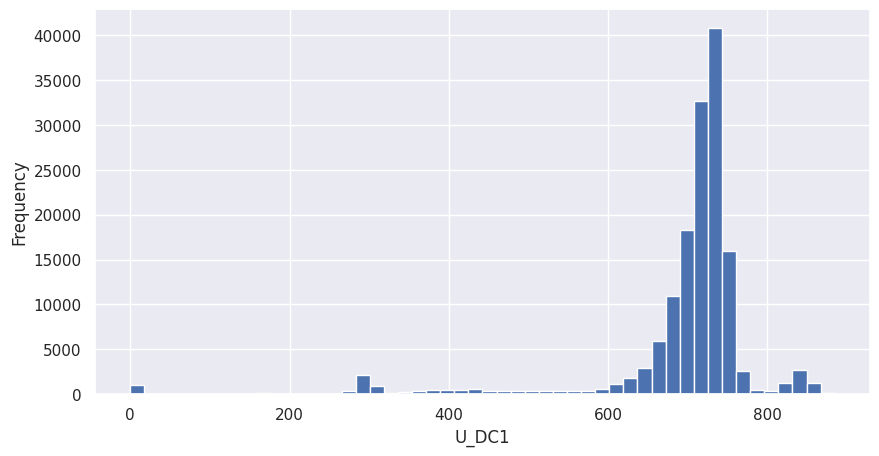

In [6]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["U_DC1"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

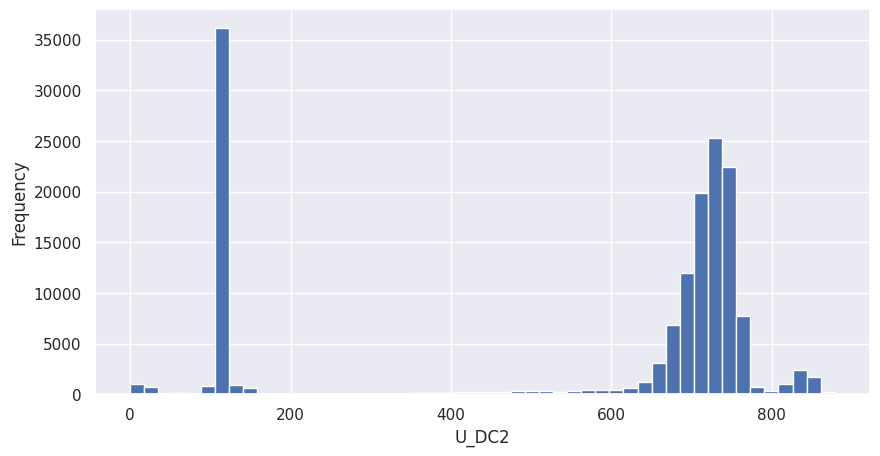

In [7]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["U_DC2"],bins=50)
plt.xlabel('U_DC2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

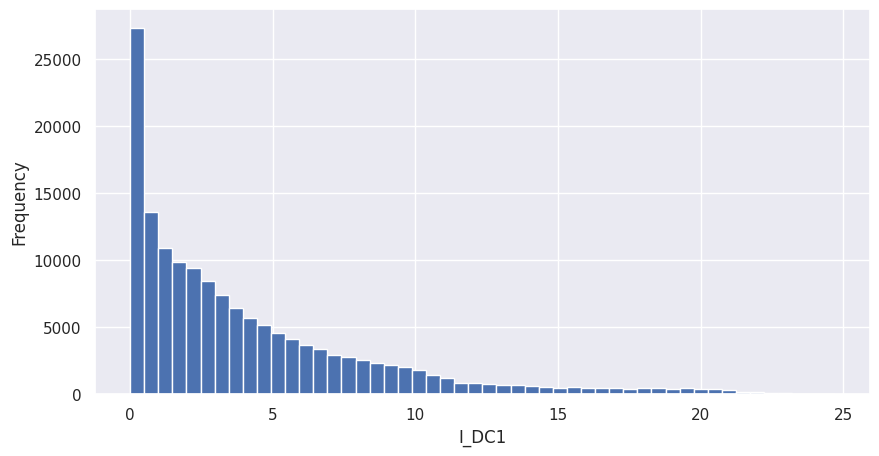

In [8]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["I_DC1"],bins=50)
plt.xlabel('I_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

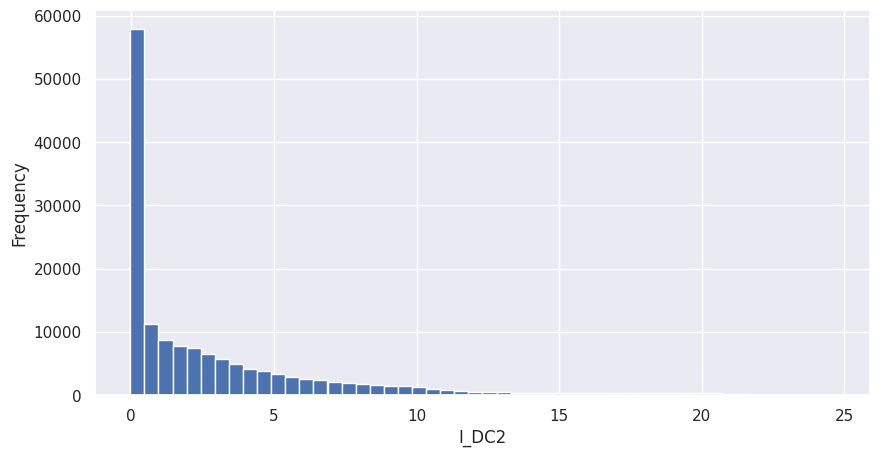

In [9]:
plt.figure(figsize=(10,5))
plt.hist(filtered_data["I_DC2"],bins=50)
plt.xlabel('I_DC2')
plt.ylabel('Frequency')

*Datos de "entrenamiento"*

Text(0, 0.5, 'Frequency')

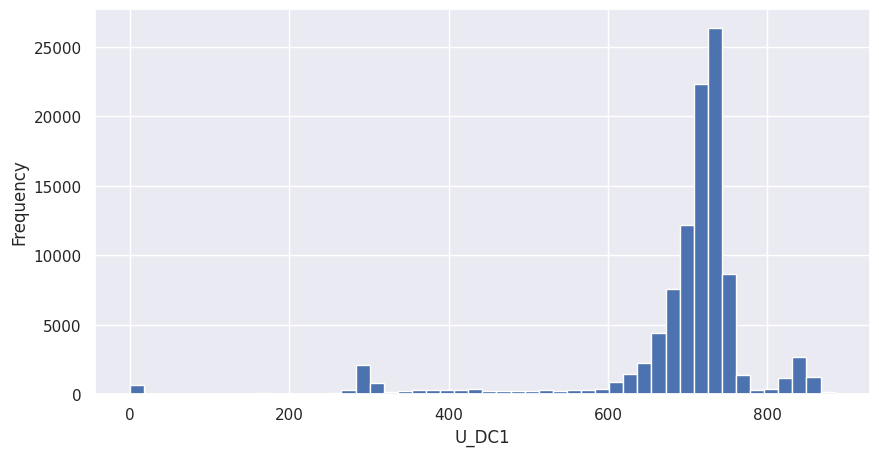

In [10]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["U_DC1"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

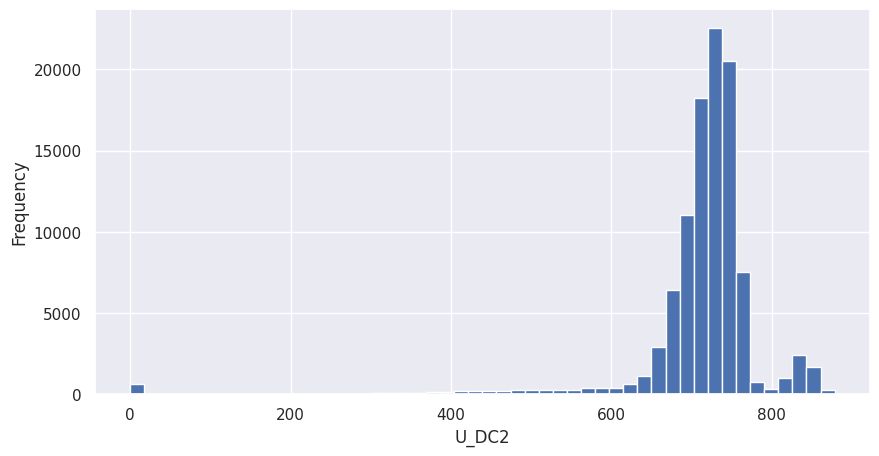

In [11]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["U_DC2"],bins=50)
plt.xlabel('U_DC2')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

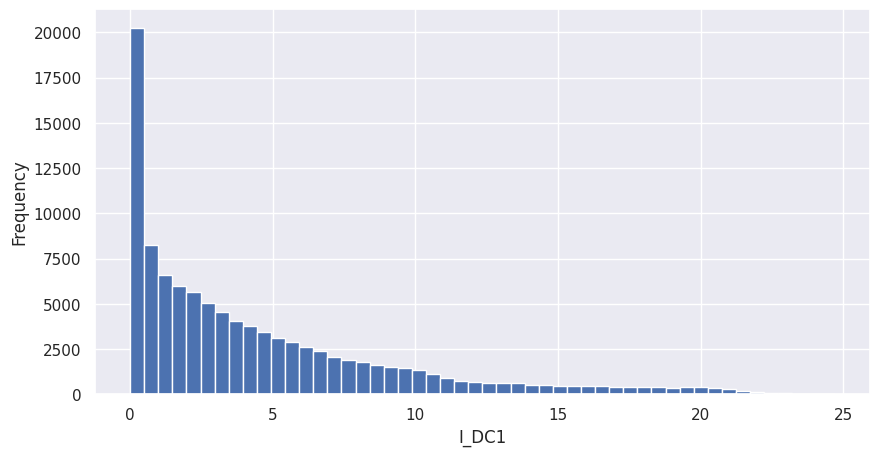

In [12]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["I_DC1"],bins=50)
plt.xlabel('I_DC1')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

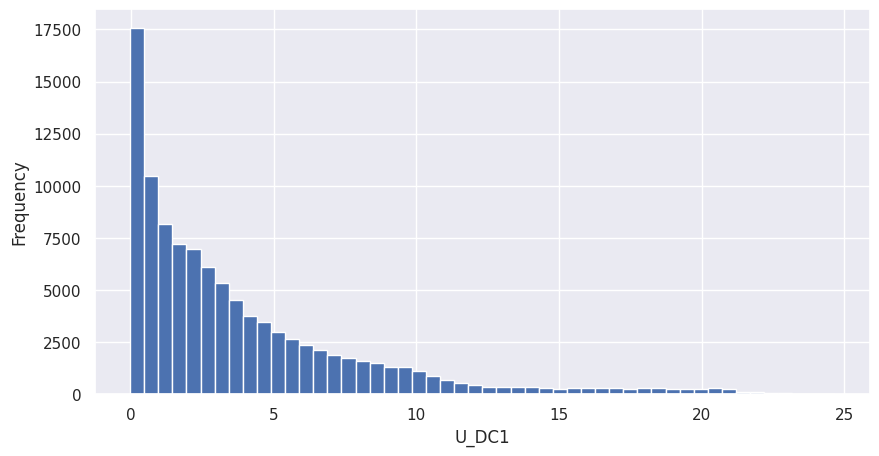

In [13]:
plt.figure(figsize=(10,5))
plt.hist(normal_operation_data["I_DC2"],bins=50)
plt.xlabel('U_DC1')
plt.ylabel('Frequency')

## **MÉTODO ESTADÍSTICO -  RANGO INTERCUARTIL**

### *Datos de entrenamiento*

In [14]:
statistical_df_train = normal_operation_data
statistical_df_test = anomaly_data
statistical_df_train.Timestamp = pd.to_datetime(statistical_df_train.Timestamp, format='%Y-%m-%d %H:%M:%S')
statistical_df_train["Time"] = statistical_df_train.Timestamp.dt.time
statistical_df_test.Timestamp = pd.to_datetime(statistical_df_test.Timestamp, format='%Y-%m-%d %H:%M:%S')
statistical_df_test["Time"] = statistical_df_test.Timestamp.dt.time

Text(0, 0.5, 'Current of the system')

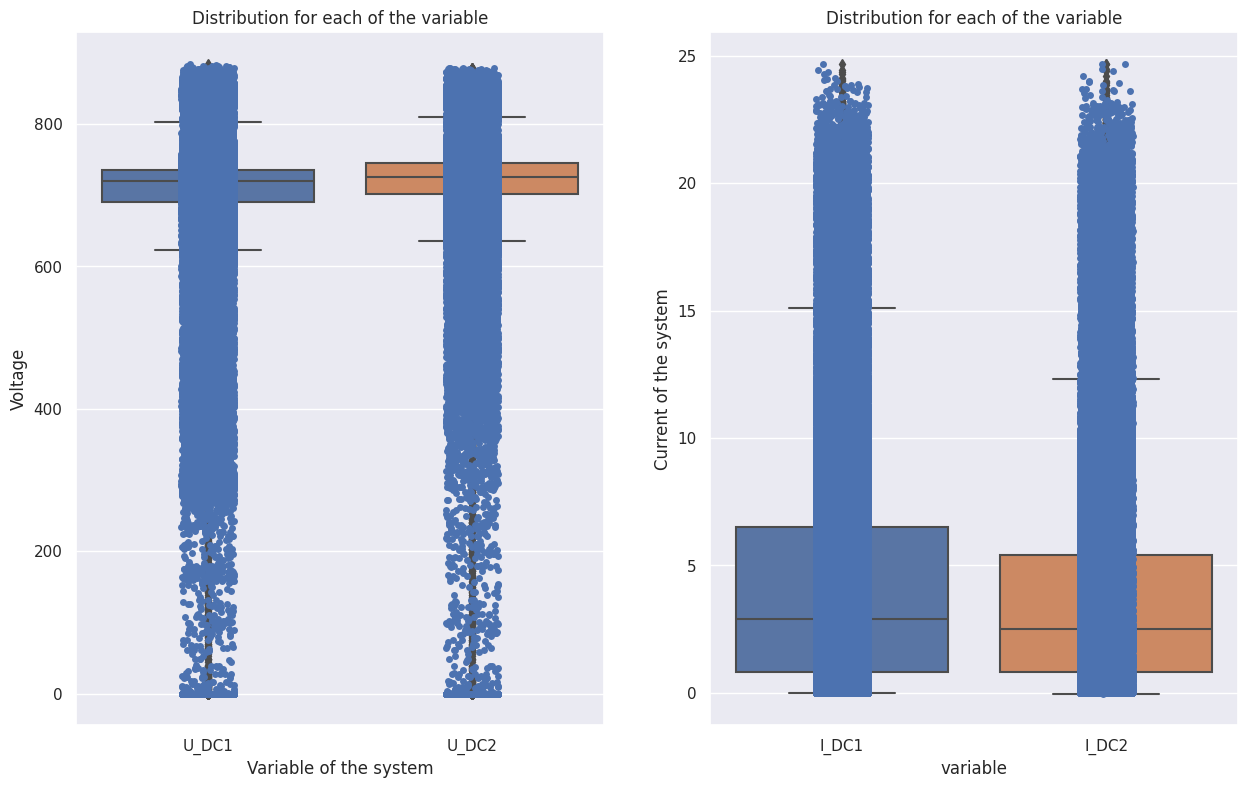

In [15]:
a = statistical_df_train[["U_DC1","U_DC2"]].melt()
b = statistical_df_train[["I_DC1","I_DC2"]].melt()
fig, axes = plt.subplots(1,2,figsize=(15,9))
sns.boxplot(x="variable",y="value",data=a,ax=axes[0])
sns.stripplot(data = a, x= "variable",y="value",ax=axes[0])
axes[0].set_title("Distribution for each of the variable")
axes[0].set_xlabel("Variable of the system")
axes[0].set_ylabel("Voltage")

sns.boxplot(x="variable",y="value",data=b,ax=axes[1])
sns.stripplot(data = b, x= "variable",y="value",ax=axes[1])
plt.title("Distribution for each of the variable")
plt.ylabel("Current of the system")

In [16]:
q1_group = statistical_df_train.groupby('Time')[['U_DC1','U_DC2','I_DC1','I_DC2']].agg(lambda x: x.quantile(0.25)).reset_index()
q3_group = statistical_df_train.groupby('Time')[['U_DC1','U_DC2','I_DC1','I_DC2']].agg(lambda x: x.quantile(0.75)).reset_index()

In [17]:
time = np.array(q1_group['Time'])

In [18]:
q1_group1 = q1_group[['U_DC1','U_DC2','I_DC1','I_DC2']]
q3_group1 = q3_group[['U_DC1','U_DC2','I_DC1','I_DC2']]

iqr_group1 = q3_group1-q1_group1
iqr_group = iqr_group1
iqr_group['Time'] = time
iqr_group1 = iqr_group1.drop('Time',axis=1)

In [19]:
lower_iqr = q1_group1 - 3*iqr_group1
upper_iqr = q3_group1 + 3*iqr_group1

In [20]:
iqr_values = pd.DataFrame()
iqr_values['Upper_UDC1'] = upper_iqr[['U_DC1']]
iqr_values['Upper_UDC2'] = upper_iqr[['U_DC2']]
iqr_values['Upper_IDC1'] = upper_iqr[['I_DC1']]
iqr_values['Upper_IDC2'] = upper_iqr[['I_DC2']]
iqr_values['Lower_UDC1'] = lower_iqr[['U_DC1']]
iqr_values['Lower_UDC2'] = lower_iqr[['U_DC2']]
iqr_values['Lower_IDC1'] = lower_iqr[['I_DC1']]
iqr_values['Lower_IDC2'] = lower_iqr[['I_DC2']]
iqr_values['Time'] = time

In [21]:
merged_df_train = pd.merge(statistical_df_train, iqr_values, how="inner", on=["Time"])

In [101]:
merged_df_train['Anomaly_UDC1'] = np.where((merged_df_train['U_DC1'] < merged_df_train['Lower_UDC1']) | (merged_df_train['U_DC1'] > merged_df_train['Upper_UDC1']), 1,0)
merged_df_train['Anomaly_UDC2'] = np.where((merged_df_train['U_DC2'] < merged_df_train['Lower_UDC2']) | (merged_df_train['U_DC2'] > merged_df_train['Upper_UDC2']), 1,0)
merged_df_train['Anomaly_IDC1'] = np.where((merged_df_train['I_DC1'] < merged_df_train['Lower_IDC1']) | (merged_df_train['I_DC1'] > merged_df_train['Upper_IDC1']), 1,0)
merged_df_train['Anomaly_IDC2'] = np.where((merged_df_train['I_DC2'] < merged_df_train['Lower_IDC2']) | (merged_df_train['I_DC2'] > merged_df_train['Upper_IDC2']), 1,0)
merged_df_train['Anomaly_String1'] = np.where((merged_df_train['Anomaly_UDC1'] == 1) | (merged_df_train['Anomaly_IDC1'] == 1), 1,0)
merged_df_train['Anomaly_String2'] = np.where((merged_df_train['Anomaly_UDC2'] == 1) | (merged_df_train['Anomaly_IDC2'] == 1), 1,0)
merged_df_train.loc[:,'Anomaly'] = np.where(
    (merged_df_train['Anomaly_String1'] == 1) |
    (merged_df_train['Anomaly_String2'] == 1),
    1,
    0
)
merged_df_train = merged_df_train.sort_values(by=['Timestamp'])

In [102]:
count0 = (merged_df_train['Anomaly'] == 0).sum()
count1 = (merged_df_train['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

93306 8930


In [24]:
anomaly_iqr_train = merged_df_train[merged_df_train['Anomaly'] == 1]
no_anomaly_iqr_train = merged_df_train[merged_df_train['Anomaly'] == 0]

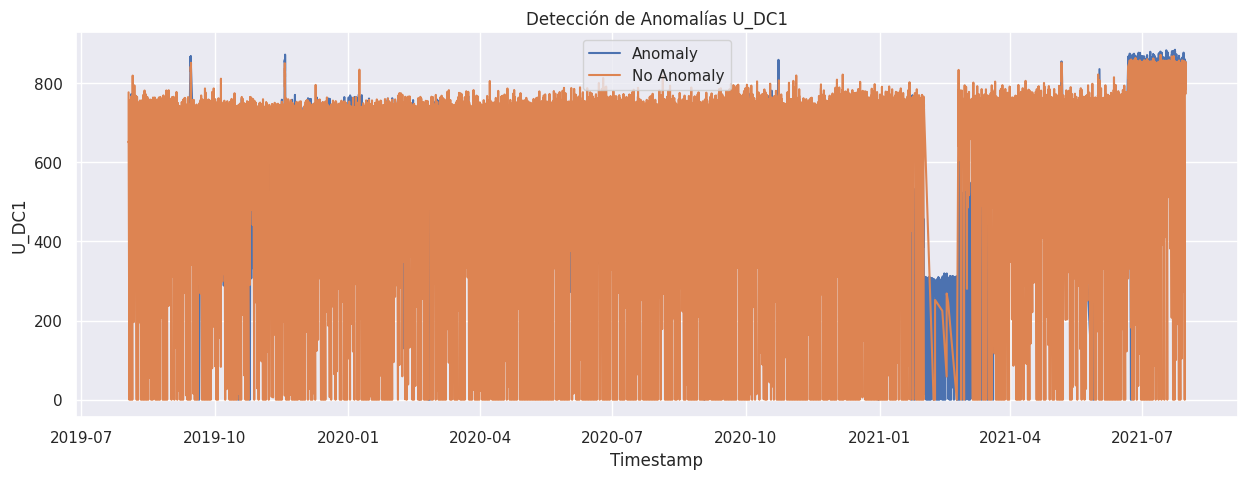

In [25]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['U_DC1'])
plt.plot(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['U_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC1')
plt.title('Detección de Anomalías U_DC1')
plt.legend(['Anomaly','No Anomaly'])

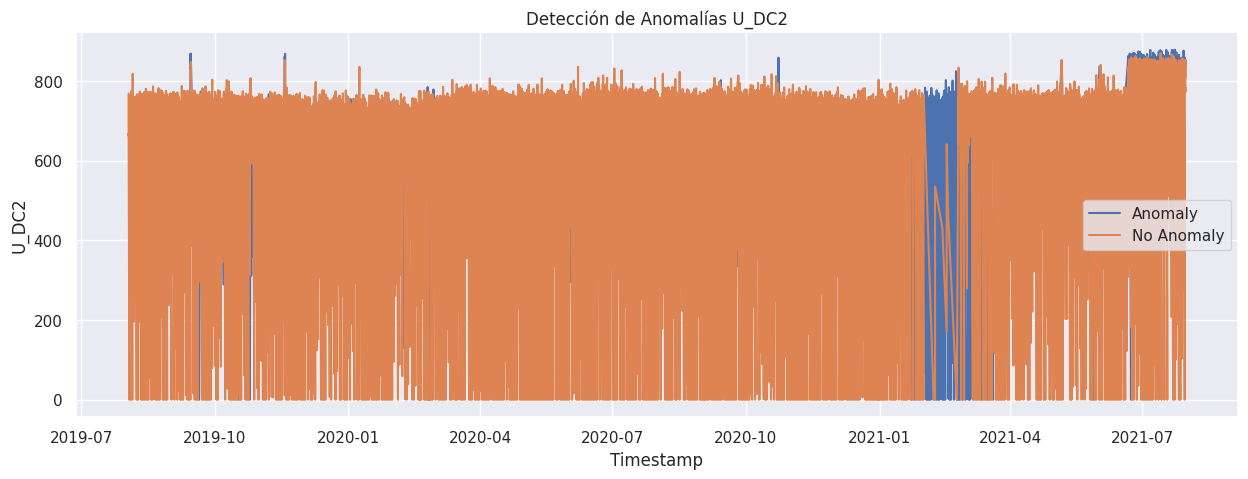

In [26]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['U_DC2'])
plt.plot(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2')
plt.title('Detección de Anomalías U_DC2')
plt.legend(['Anomaly','No Anomaly'])

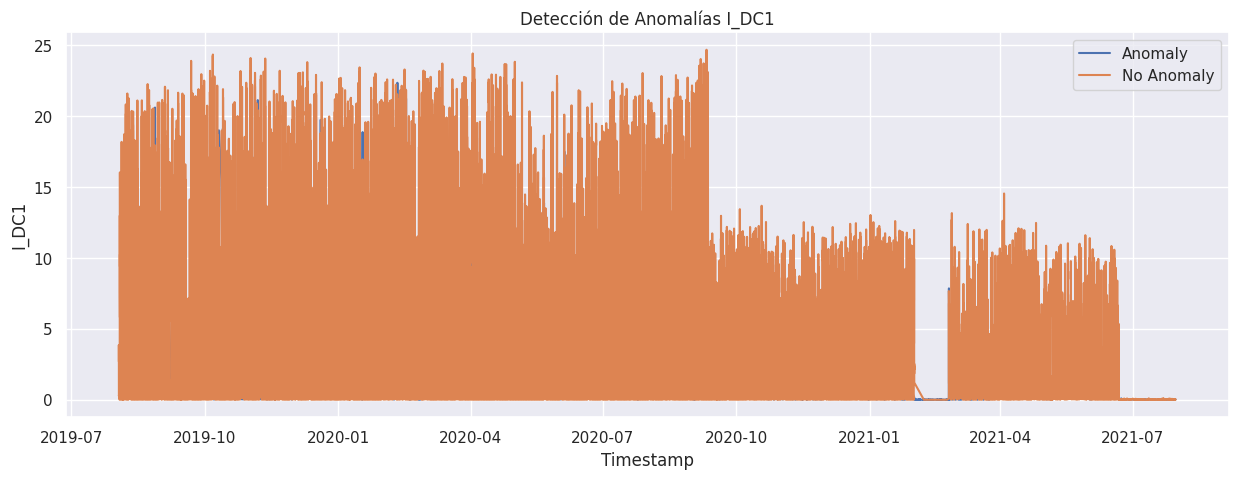

In [27]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['I_DC1'])
plt.plot(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['I_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC1')
plt.title('Detección de Anomalías I_DC1')
plt.legend(['Anomaly','No Anomaly'])

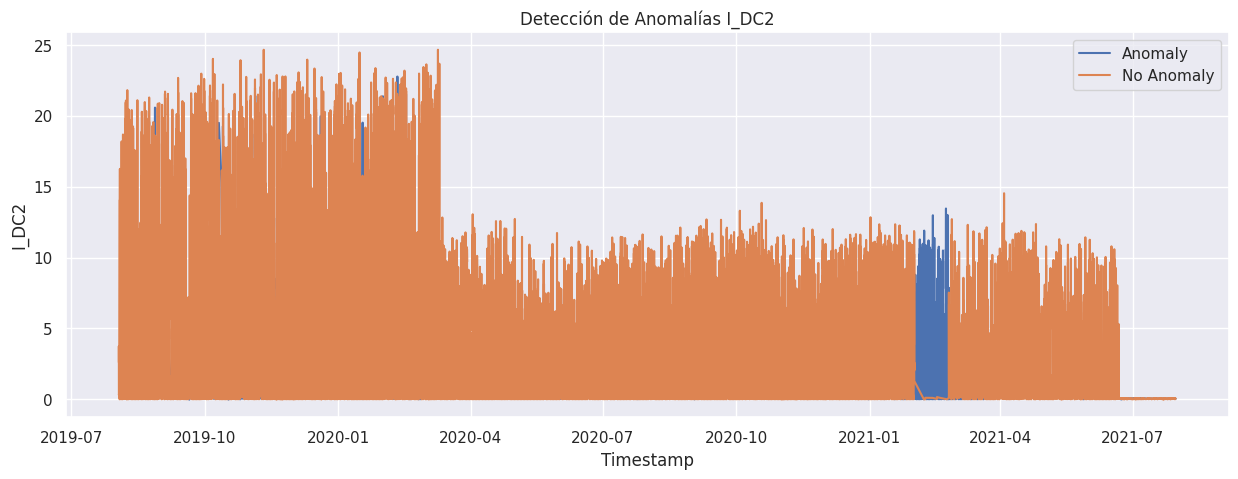

In [28]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_train['Timestamp'],anomaly_iqr_train['I_DC2'])
plt.plot(no_anomaly_iqr_train['Timestamp'],no_anomaly_iqr_train['I_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC2')
plt.title('Detección de Anomalías I_DC2')
plt.legend(['Anomaly','No Anomaly'])

In [97]:
merged_df_train

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Time,Upper_UDC1,Upper_UDC2,Upper_IDC1,Upper_IDC2,...,Lower_UDC2,Lower_IDC1,Lower_IDC2,Anomaly_UDC1,Anomaly_UDC2,Anomaly_IDC1,Anomaly_IDC2,Anomaly_String1,Anomaly_String2,Anomaly
0,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,16:25:00,923.7590,886.0335,8.4615,5.5035,...,544.7240,-5.3775,-3.0575,0,0,0,0,0,0,1
728,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,16:30:00,894.4745,880.3615,7.7855,5.1540,...,549.4995,-4.8810,-2.8470,0,0,0,0,0,0,1
1456,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,16:35:00,901.4545,886.9950,7.6950,4.9345,...,542.3745,-4.9155,-2.7480,0,0,0,0,0,0,1
2184,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,16:40:00,897.8275,876.7320,6.6050,4.4035,...,549.6115,-4.1400,-2.3725,0,0,0,0,0,0,1
2912,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,16:45:00,884.6805,877.0080,5.9200,4.2875,...,552.2990,-3.6700,-2.3520,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7279,2021-07-30 17:10:00,788.168,788.084,0.020,0.050,17:10:00,879.9830,853.7770,3.5355,2.5220,...,545.4655,-2.1940,-1.3560,0,0,0,0,0,0,1
8007,2021-07-30 17:15:00,780.194,780.138,0.020,0.050,17:15:00,876.8885,844.2770,3.0220,2.2355,...,547.4665,-1.8710,-1.2050,0,0,0,0,0,0,1
8735,2021-07-30 17:20:00,772.618,772.588,0.020,0.050,17:20:00,885.7275,837.7750,2.5680,1.8875,...,544.8880,-1.5795,-1.0035,0,0,0,0,0,0,1
9463,2021-07-30 17:25:00,775.204,775.162,0.020,0.050,17:25:00,890.7275,837.6390,2.2820,1.6360,...,535.2110,-1.4315,-0.8630,0,0,0,0,0,0,1


### *Datos de prueba*

In [30]:
#Agrupar con datos de prueba
merged_df_test = pd.merge(anomaly_data, iqr_values, how="inner", on=["Time"])

In [98]:
merged_df_test['Anomaly_UDC1'] = np.where((merged_df_test['U_DC1'] < merged_df_test['Lower_UDC1']) | (merged_df_test['U_DC1'] > merged_df_test['Upper_UDC1']), 1,0)
merged_df_test['Anomaly_UDC2'] = np.where((merged_df_test['U_DC2'] < merged_df_test['Lower_UDC2']) | (merged_df_test['U_DC2'] > merged_df_test['Upper_UDC2']), 1,0)
merged_df_test['Anomaly_IDC1'] = np.where((merged_df_test['I_DC1'] < merged_df_test['Lower_IDC1']) | (merged_df_test['I_DC1'] > merged_df_test['Upper_IDC1']), 1,0)
merged_df_test['Anomaly_IDC2'] = np.where((merged_df_test['I_DC2'] < merged_df_test['Lower_IDC2']) | (merged_df_test['I_DC2'] > merged_df_test['Upper_IDC2']), 1,0)

merged_df_test['Anomaly_String1'] = np.where((merged_df_test['Anomaly_UDC1'] == 1) | (merged_df_test['Anomaly_IDC1'] == 1), 1,0)
merged_df_test['Anomaly_String2'] = np.where((merged_df_test['Anomaly_UDC2'] == 1) | (merged_df_test['Anomaly_IDC2'] == 1), 1,0)

merged_df_test.loc[:,'Anomaly'] = np.where(
    (merged_df_test['Anomaly_String1'] == 1) |
    (merged_df_test['Anomaly_String2'] == 1),
    1,
    0
)

merged_df_test = merged_df_test.sort_values(by=['Timestamp'])

In [99]:
count0 = (merged_df_test['Anomaly'] == 0).sum()
count1 = (merged_df_test['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

9195 38967


In [33]:
anomaly_iqr_test = merged_df_test[merged_df_test['Anomaly'] == 1]
no_anomaly_iqr_test = merged_df_test[merged_df_test['Anomaly'] == 0]

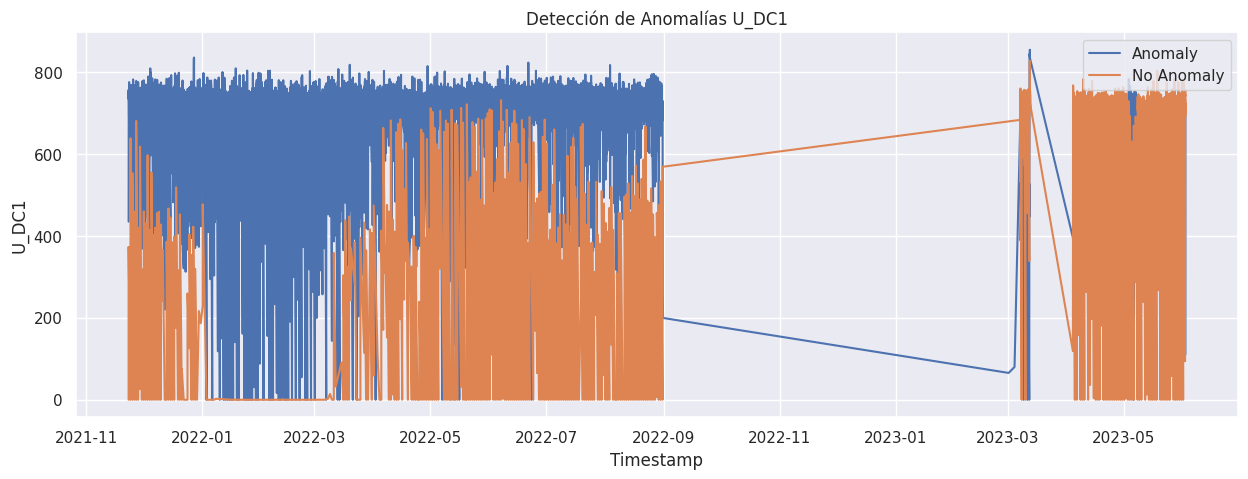

In [34]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['U_DC1'])
plt.plot(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC1')
plt.title('Detección de Anomalías U_DC1')
plt.legend(['Anomaly','No Anomaly'])

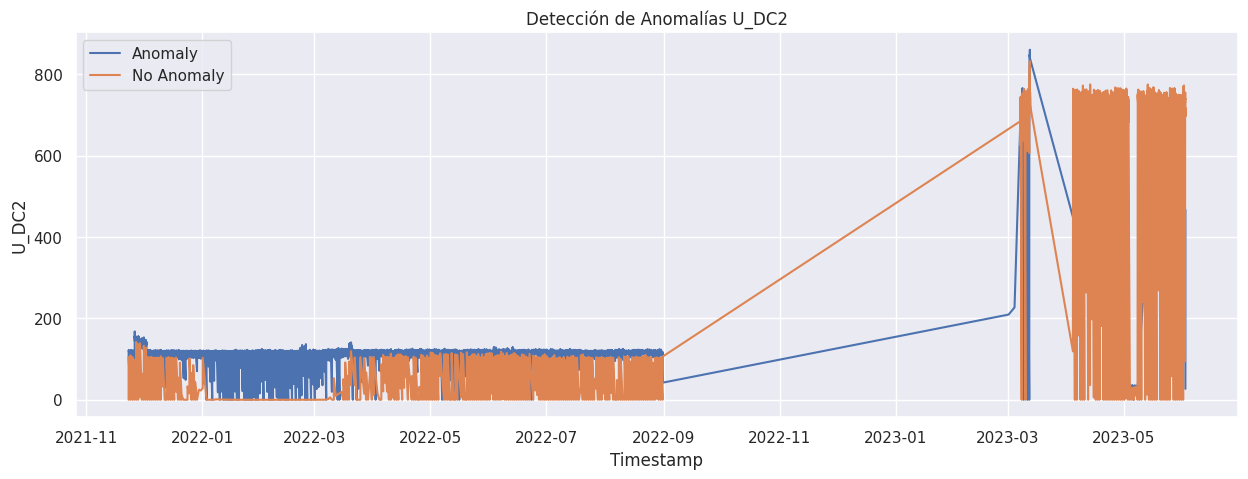

In [35]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['U_DC2'])
plt.plot(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2')
plt.title('Detección de Anomalías U_DC2')
plt.legend(['Anomaly','No Anomaly'])

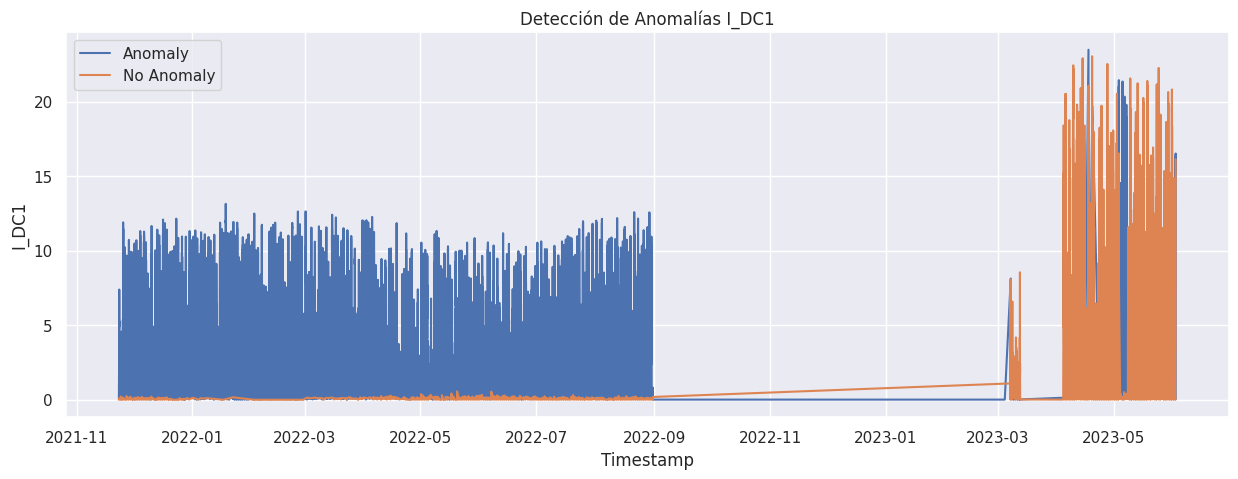

In [36]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['I_DC1'])
plt.plot(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['I_DC1'])
plt.xlabel('Timestamp')
plt.ylabel('I_DC1')
plt.title('Detección de Anomalías I_DC1')
plt.legend(['Anomaly','No Anomaly'])

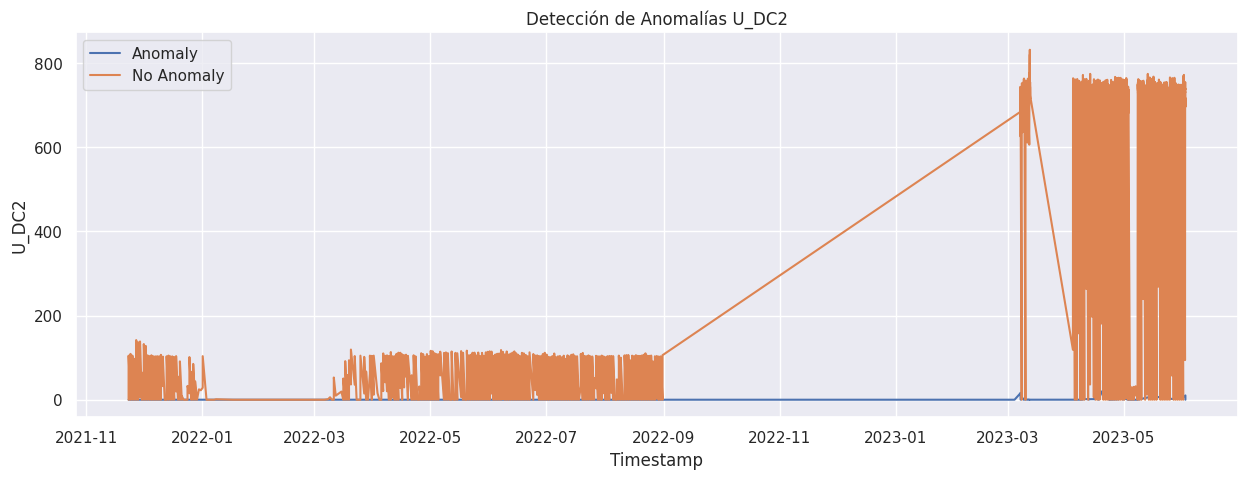

In [37]:
plt.figure(figsize=(15, 5))
plt.plot(anomaly_iqr_test['Timestamp'],anomaly_iqr_test['I_DC2'])
plt.plot(no_anomaly_iqr_test['Timestamp'],no_anomaly_iqr_test['U_DC2'])
plt.xlabel('Timestamp')
plt.ylabel('U_DC2')
plt.title('Detección de Anomalías U_DC2')
plt.legend(['Anomaly','No Anomaly'])

## **MÉTODOS DE MACHINE LEARNING PARA DETECCIÓN DE ANOMALÍAS**



No supervisado

###*Método Normal K-Means*

In [38]:
#Preparar datos, sirven para problemas futuros
df_kmeans_normal = filtered_data

time = df_kmeans_normal[['Timestamp']]
rows = df_kmeans_normal[['U_DC1','U_DC2','I_DC1','I_DC2']]

scaler = StandardScaler()
scaled_df_kmeans_normal = scaler.fit_transform(rows)

df_train_kmeans_normal = df_kmeans_normal[(df_kmeans_normal['Timestamp'] < '2021-09-03')]
df_test_kmeans_normal = df_kmeans_normal[(df_kmeans_normal['Timestamp'] >= '2021-09-03')]

train_kmeans_normal = scaled_df_kmeans_normal[0:102236]
test_kmeans_normal = scaled_df_kmeans_normal[102236:150398]


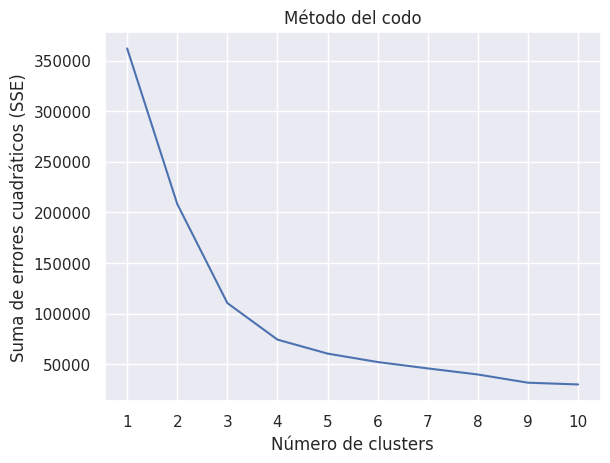

In [39]:
#Método del codo para encontrar un número k apropiado

kmeans_kwargs = {
"init": "random",
"n_init": 10,
"random_state": 1,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(train_kmeans_normal)
    sse.append(kmeans.inertia_)

#visualize results
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Número de clusters")
plt.ylabel("Suma de errores cuadráticos (SSE)")
plt.title("Método del codo")
plt.show()

#### Datos de entrenamiento

In [40]:
kmeans_normal = KMeans(n_clusters=2, random_state=42)
kmeans_normal.fit(train_kmeans_normal)
anomalies_kmeans_normal = np.array(kmeans_normal.labels_)
df_train_kmeans_normal['Anomaly'] = anomalies_kmeans_normal

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-40-ded5c7bcda67>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_kmeans_normal['Anomaly'] = anomalies_kmeans_normal


In [41]:
count0 = (df_train_kmeans_normal['Anomaly'] == 0).sum()
count1 = (df_train_kmeans_normal['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

81215 21021


In [42]:
anomaly_kmeans_normal_train = df_train_kmeans_normal[df_train_kmeans_normal['Anomaly'] == 1]
no_anomaly_kmeans_normal_train = df_train_kmeans_normal[df_train_kmeans_normal['Anomaly'] == 0]

In [43]:
#Coincidencias con Modelo Estadístico
#KMeans_Normal
print(anomaly_iqr_train['Timestamp'].isin(anomaly_kmeans_normal_train['Timestamp']).sum())

692


#### Datos de prueba

In [44]:
prediction_kmeans_normal = np.array(kmeans_normal.predict(test_kmeans_normal))
df_test_kmeans_normal['Anomaly'] = prediction_kmeans_normal
anomaly_kmeans_normal_test = df_test_kmeans_normal[df_test_kmeans_normal['Anomaly'] == 1]
no_anomaly_kmeans_normal_test = df_test_kmeans_normal[df_test_kmeans_normal['Anomaly'] == 0]

<ipython-input-44-2e562e83fa8f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_kmeans_normal['Anomaly'] = prediction_kmeans_normal


In [45]:
#Coincidencias con Modelo Estadístico
#KMeans_Normal
print(anomaly_iqr_test['Timestamp'].isin(anomaly_kmeans_normal_test['Timestamp']).sum())

115


### *Método K-Means Thresholding*

In [46]:
df_kmeans_threshold = filtered_data

time = df_kmeans_threshold[['Timestamp']]
rows = df_kmeans_threshold[['U_DC1','U_DC2','I_DC1','I_DC2']]

scaler = StandardScaler()
scaled_df_kmeans_threshold = scaler.fit_transform(rows)

df_train_kmeans_threshold = df_kmeans_threshold[(df_kmeans_threshold['Timestamp'] < '2021-09-03')]
df_test_kmeans_threshold = df_kmeans_threshold[(df_kmeans_threshold['Timestamp'] >= '2021-09-03')]

train_kmeans_threshold = scaled_df_kmeans_threshold[0:102236]
test_kmeans_threshold = scaled_df_kmeans_threshold[102236:150398]

#### Datos de entrenamiento

In [47]:
kmeans_threshold = KMeans(n_clusters=2, random_state=42)
kmeans_threshold.fit(train_kmeans_threshold)
distances = pairwise_distances_argmin_min(train_kmeans_threshold, kmeans_threshold.cluster_centers_)[1]
sorted_distances_indices = np.argsort(distances)[::-1]
threshold = np.percentile(distances, 85)
anomalies_threshold = [index for index in sorted_distances_indices if distances[index] > threshold]
df_train_kmeans_threshold['Anomaly'] = 0
df_train_kmeans_threshold.loc[df_train_kmeans_threshold.index[anomalies_threshold], 'Anomaly'] = 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-47-a16408dcf042>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_kmeans_threshold['Anomaly'] = 0


In [48]:
count0 = (df_train_kmeans_threshold['Anomaly'] == 0).sum()
count1 = (df_train_kmeans_threshold['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

86900 15336


In [49]:
anomaly_kmeans_threshold_train = df_train_kmeans_threshold[df_train_kmeans_threshold['Anomaly'] == 1]
no_anomaly_kmeans_threshold_train = df_train_kmeans_threshold[df_train_kmeans_threshold['Anomaly'] == 0]

In [50]:
#Coincidencias con Modelo Estadístico
#KMeans_Threshold
print(anomaly_iqr_train['Timestamp'].isin(anomaly_kmeans_threshold_train['Timestamp']).sum())

7063


#### Datos de prueba

In [51]:
prediction_kmeans_threshold = np.array(kmeans_threshold.predict(test_kmeans_threshold))
df_test_kmeans_threshold['Anomaly'] = prediction_kmeans_threshold
anomaly_kmeans_threshold_test = df_test_kmeans_threshold[df_test_kmeans_threshold['Anomaly'] == 1]
no_anomaly_kmeans_threshold_test = df_test_kmeans_threshold[df_test_kmeans_threshold['Anomaly'] == 0]

<ipython-input-51-c24c0c56f8ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_kmeans_threshold['Anomaly'] = prediction_kmeans_threshold


In [52]:
count0 = (df_test_kmeans_threshold['Anomaly'] == 0).sum()
count1 = (df_test_kmeans_threshold['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

45613 2549


In [53]:
#Coincidencias con Modelo Estadístico
#KMeans_Threshold
print(anomaly_iqr_test['Timestamp'].isin(anomaly_kmeans_threshold_test['Timestamp']).sum())

115


### *Método K-Means Usando Diferencia de Voltajes y Suma de Corrientes*

In [54]:
df_kmeans_alternative = filtered_data

time = df_kmeans_alternative[['Timestamp']]
rows = df_kmeans_alternative[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_kmeans_alternative = df_kmeans_alternative[(df_kmeans_alternative['Timestamp'] < '2021-09-03')]
df_test_kmeans_alternative = df_kmeans_alternative[(df_kmeans_alternative['Timestamp'] >= '2021-09-03')]

data_alternative = pd.DataFrame()
data_alternative['Voltage Difference'] = abs(df_kmeans_alternative['U_DC1']-df_kmeans_alternative['U_DC2'])
data_alternative['Current Sum'] = abs(df_kmeans_alternative['I_DC1']+df_kmeans_alternative['I_DC2'])

scaled_df_kmeans_alternative = scaler.fit_transform(data_alternative)

train_kmeans_alternative = scaled_df_kmeans_alternative[0:102236]
test_kmeans_alternative = scaled_df_kmeans_alternative[102236:150398]

#### Datos de entrenamiento

In [55]:
kmeans_alternative = KMeans(n_clusters=2, random_state=42)
kmeans_alternative.fit(train_kmeans_alternative)
anomalies_kmeans_alternative = np.array(kmeans_alternative.labels_)
df_train_kmeans_alternative['Anomaly'] = anomalies_kmeans_alternative

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-55-bfd9cff54d62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_kmeans_alternative['Anomaly'] = anomalies_kmeans_alternative


In [56]:
count0 = (df_train_kmeans_alternative['Anomaly'] == 0).sum()
count1 = (df_train_kmeans_alternative['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

81182 21054


In [57]:
anomaly_kmeans_alt_train = df_train_kmeans_alternative[df_train_kmeans_alternative['Anomaly'] == 1]
no_anomaly_kmeans_alt_train = df_train_kmeans_alternative[df_train_kmeans_alternative['Anomaly'] == 0]

In [58]:
#Coincidencias con Modelo Estadístico
#KMeans_Alternativo
print(anomaly_iqr_train['Timestamp'].isin(anomaly_kmeans_alt_train['Timestamp']).sum())

696


#### Datos de prueba

In [59]:
prediction_kmeans_alternative = np.array(kmeans_alternative.predict(test_kmeans_alternative))
df_test_kmeans_alternative['Anomaly'] = prediction_kmeans_alternative

anomaly_kmeans_alt_test = df_test_kmeans_alternative[df_test_kmeans_alternative['Anomaly'] == 1]
no_anomaly_kmeans_alt_test = df_test_kmeans_alternative[df_test_kmeans_alternative['Anomaly'] == 0]

<ipython-input-59-ccbd9a5fab97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_kmeans_alternative['Anomaly'] = prediction_kmeans_alternative


In [60]:
count0 = (df_test_kmeans_alternative['Anomaly'] == 0).sum()
count1 = (df_test_kmeans_alternative['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

45632 2530


In [61]:
#Coincidencias con Modelo Estadístico
#KMeans_Alternativo
print(anomaly_iqr_test['Timestamp'].isin(anomaly_kmeans_alt_test['Timestamp']).sum())

97


### *Gráficas de Comparación K-Means*

#### Datos de entrenamiento

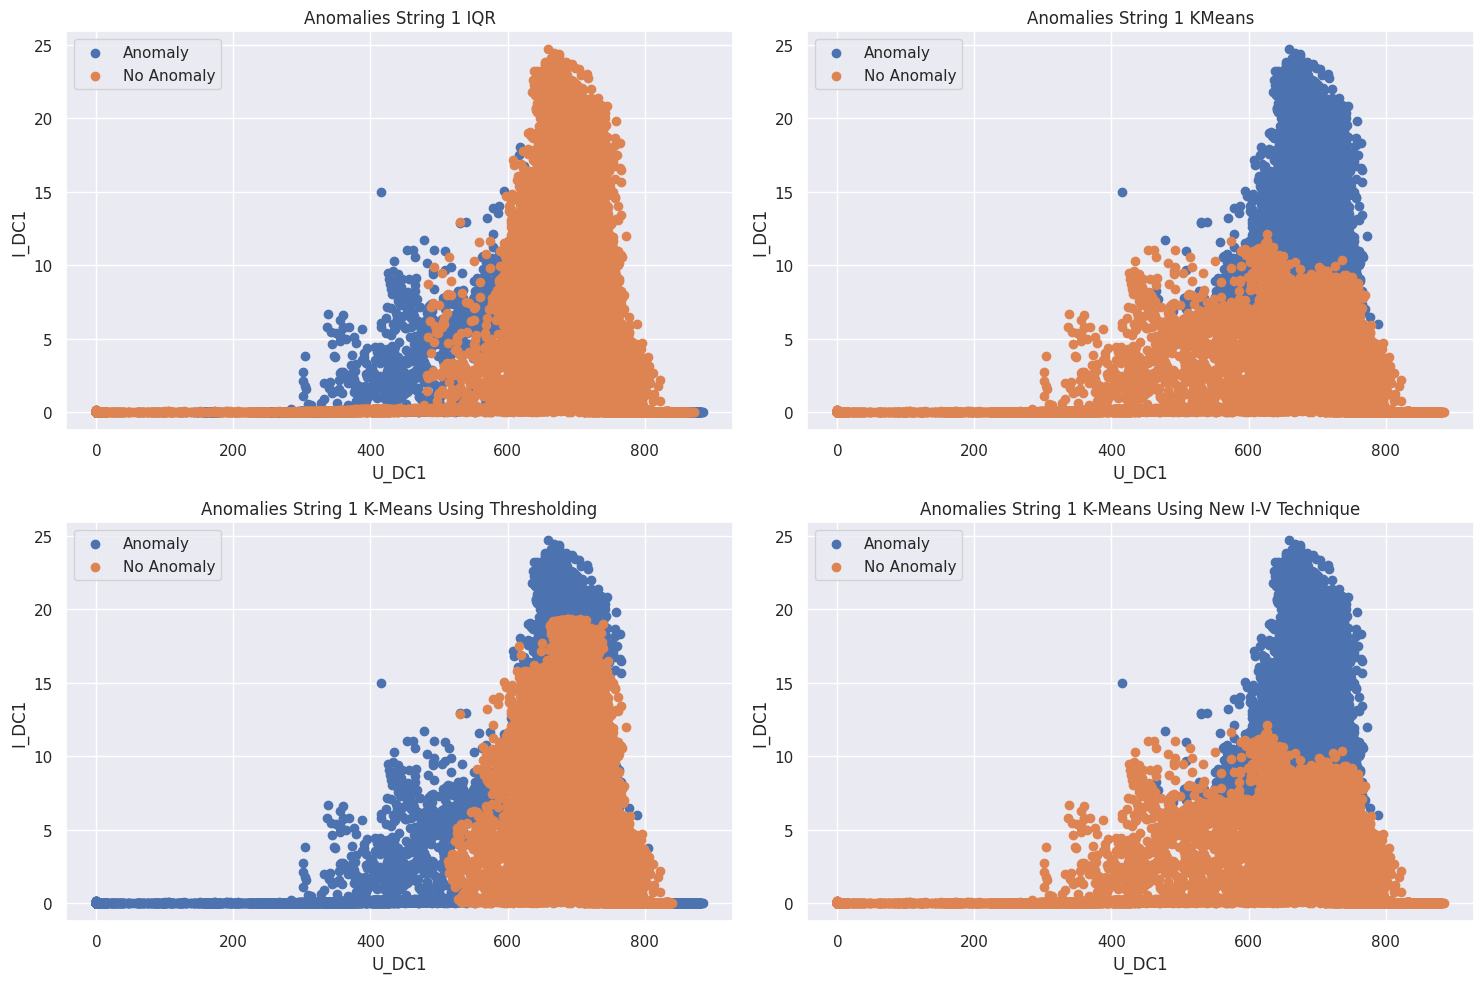

In [62]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))


# Gráfico 1
plt.subplot(2, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(2, 2, 2)
plt.scatter(anomaly_kmeans_normal_train['U_DC1'], anomaly_kmeans_normal_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_normal_train['U_DC1'], no_anomaly_kmeans_normal_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 KMeans')


# Gráfico 3
plt.subplot(2, 2, 3)
plt.scatter(anomaly_kmeans_threshold_train['U_DC1'], anomaly_kmeans_threshold_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_threshold_train['U_DC1'], no_anomaly_kmeans_threshold_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 K-Means Using Thresholding')


# Gráfico 3
plt.subplot(2, 2, 4)
plt.scatter(anomaly_kmeans_alt_train['U_DC1'], anomaly_kmeans_alt_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_alt_train['U_DC1'], no_anomaly_kmeans_alt_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 K-Means Using New I-V Technique')


# Ajustes de diseño
plt.tight_layout()
plt.show()



plt.show()

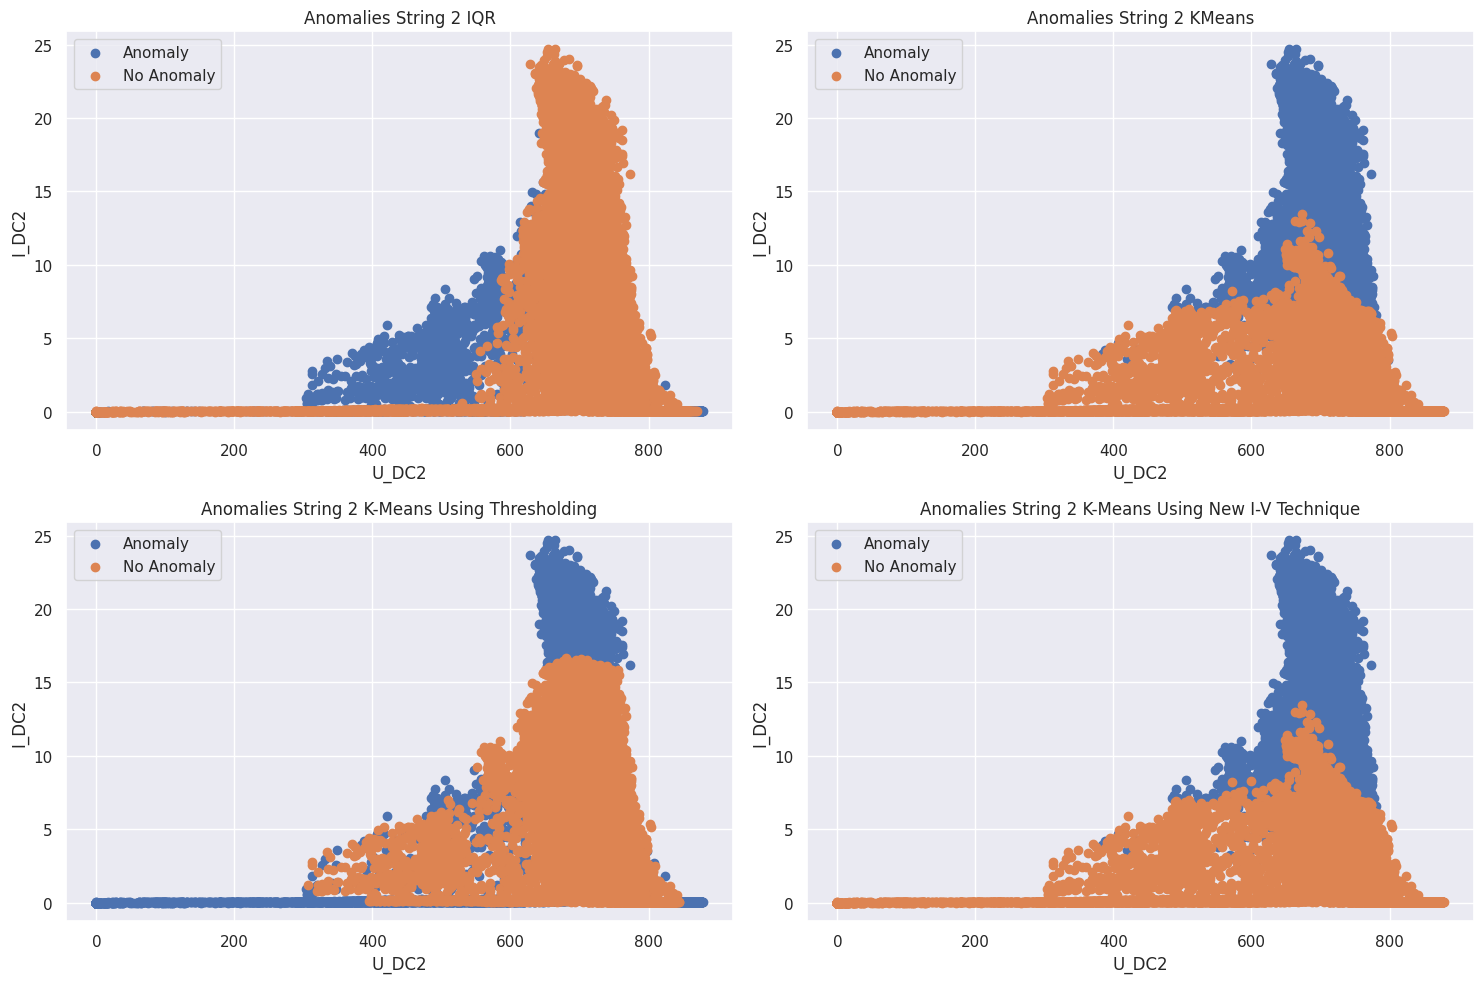

In [63]:
#STRING2

# Gráfico 1
plt.figure(figsize=(15, 10))


# Gráfico 1
plt.subplot(2, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(2, 2, 2)
plt.scatter(anomaly_kmeans_normal_train['U_DC2'], anomaly_kmeans_normal_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_normal_train['U_DC2'], no_anomaly_kmeans_normal_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 KMeans')


# Gráfico 3
plt.subplot(2, 2, 3)
plt.scatter(anomaly_kmeans_threshold_train['U_DC2'], anomaly_kmeans_threshold_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_threshold_train['U_DC2'], no_anomaly_kmeans_threshold_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 K-Means Using Thresholding')


# Gráfico 3
plt.subplot(2, 2, 4)
plt.scatter(anomaly_kmeans_alt_train['U_DC2'], anomaly_kmeans_alt_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_alt_train['U_DC2'], no_anomaly_kmeans_alt_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 K-Means Using New I-V Technique')


# Ajustes de diseño
plt.tight_layout()
plt.show()



plt.show()

#### Datos de prueba

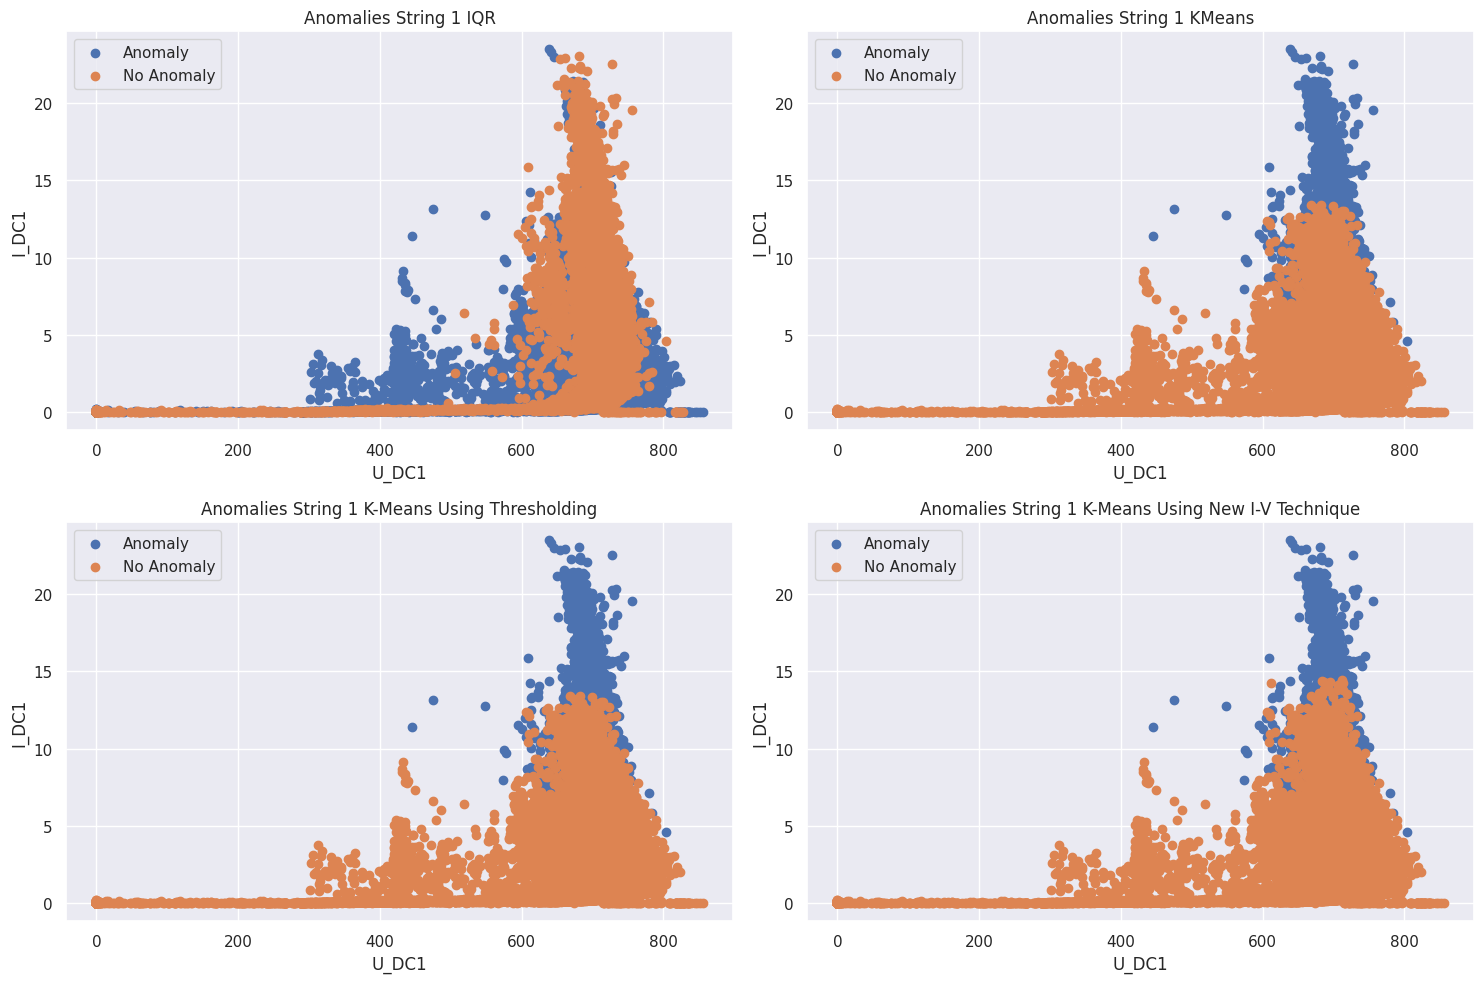

In [64]:
#STRING1

# Gráfico 1
plt.figure(figsize=(15, 10))


# Gráfico 1
plt.subplot(2, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(2, 2, 2)
plt.scatter(anomaly_kmeans_normal_test['U_DC1'], anomaly_kmeans_normal_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_normal_test['U_DC1'], no_anomaly_kmeans_normal_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 KMeans')


# Gráfico 3
plt.subplot(2, 2, 3)
plt.scatter(anomaly_kmeans_threshold_test['U_DC1'], anomaly_kmeans_threshold_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_threshold_test['U_DC1'], no_anomaly_kmeans_threshold_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 K-Means Using Thresholding')


# Gráfico 3
plt.subplot(2, 2, 4)
plt.scatter(anomaly_kmeans_alt_test['U_DC1'], anomaly_kmeans_alt_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_alt_test['U_DC1'], no_anomaly_kmeans_alt_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 K-Means Using New I-V Technique')


# Ajustes de diseño
plt.tight_layout()
plt.show()



plt.show()

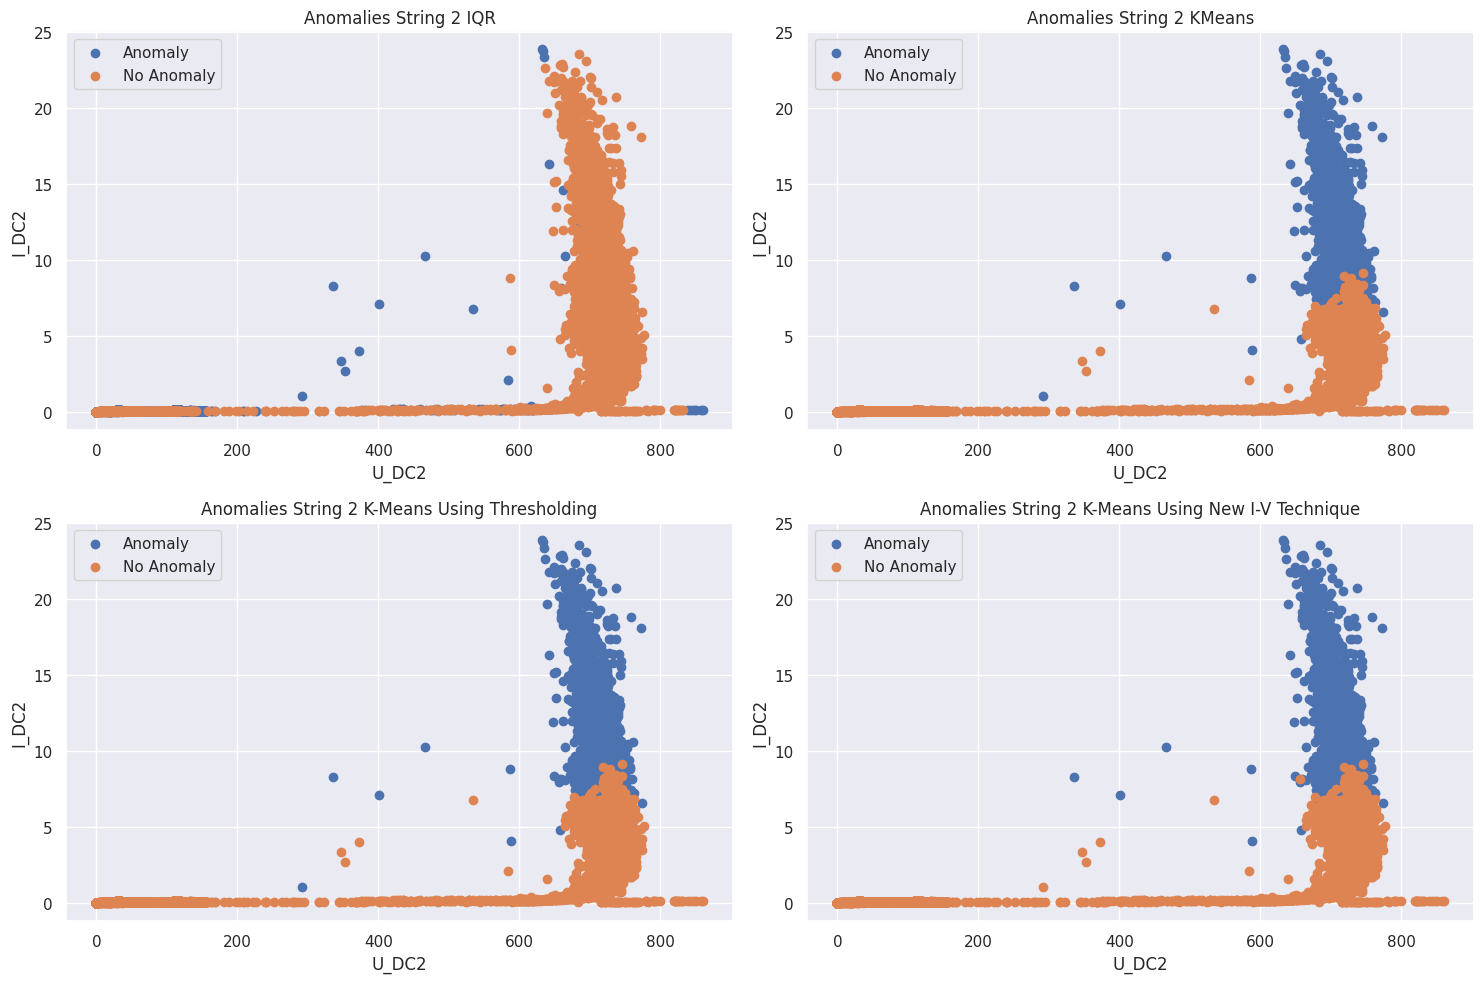

In [65]:
#STRING2

# Gráfico 1
plt.figure(figsize=(15, 10))


# Gráfico 1
plt.subplot(2, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(2, 2, 2)
plt.scatter(anomaly_kmeans_normal_test['U_DC2'], anomaly_kmeans_normal_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_normal_test['U_DC2'], no_anomaly_kmeans_normal_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 KMeans')


# Gráfico 3
plt.subplot(2, 2, 3)
plt.scatter(anomaly_kmeans_threshold_test['U_DC2'], anomaly_kmeans_threshold_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_threshold_test['U_DC2'], no_anomaly_kmeans_threshold_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 K-Means Using Thresholding')


# Gráfico 3
plt.subplot(2, 2, 4)
plt.scatter(anomaly_kmeans_alt_test['U_DC2'], anomaly_kmeans_alt_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_kmeans_alt_test['U_DC2'], no_anomaly_kmeans_alt_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 K-Means Using New I-V Technique')


# Ajustes de diseño
plt.tight_layout()
plt.show()



plt.show()

### *Método Isolation Forest*

In [66]:
df_if = filtered_data

time = df_if[['Timestamp']]
rows_if = df_if[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_if = df_if[(df_if['Timestamp'] < '2021-09-03')]
df_test_if = df_if[(df_if['Timestamp'] >= '2021-09-03')]

scaled_df_if = scaler.fit_transform(rows_if)

x_train_if = scaled_df_if[0:102236]
x_test_if = scaled_df_if[102236:150398]

y_train_if = np.array(merged_df_train['Anomaly'])
y_train_if[y_train_if == 1] = -1
y_train_if[y_train_if == 0] = 1

#### Datos de entrenamiento

In [67]:
"""
isolation_forest = IsolationForest(random_state=42)

param_grid_if = {'n_estimators': np.array((range(100, 800, 50))),
              'bootstrap': np.array([True, False]),}

grid_dt_estimator_if = model_selection.GridSearchCV(isolation_forest,
                                                 param_grid_if,
                                                 scoring='accuracy',
                                                 refit=True,
                                                 cv=5,
                                                 return_train_score=True)

grid_dt_estimator_if.fit(x_train_if, y_train_if)



print("Best parameters found:")
print(grid_dt_estimator_if.best_params_)
"""

'\nisolation_forest = IsolationForest(random_state=42)\n\nparam_grid_if = {\'n_estimators\': np.array((range(100, 800, 50))),\n              \'bootstrap\': np.array([True, False]),}\n\ngrid_dt_estimator_if = model_selection.GridSearchCV(isolation_forest,\n                                                 param_grid_if,\n                                                 scoring=\'accuracy\',\n                                                 refit=True,\n                                                 cv=5,\n                                                 return_train_score=True)\n\ngrid_dt_estimator_if.fit(x_train_if, y_train_if)\n\n\n\nprint("Best parameters found:")\nprint(grid_dt_estimator_if.best_params_)\n'

In [68]:
best_if_model = IsolationForest(random_state=42, bootstrap=False, n_estimators=150, contamination='auto',max_samples='auto',max_features=2)
#Train model
best_if_model.fit(x_train_if)
pred_if_model_train = np.array(best_if_model.predict(x_train_if))
df_train_if['Anomaly'] = pred_if_model_train

<ipython-input-68-3017a08d5125>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_if['Anomaly'] = pred_if_model_train


In [69]:
anomaly_if_train = df_train_if[df_train_if['Anomaly'] == -1]
no_anomaly_if_train = df_train_if[df_train_if['Anomaly'] == 1]

In [70]:
count0 = (df_train_if['Anomaly'] == 1).sum()
count1 = (df_train_if['Anomaly'] == -1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

84702 17534


### *Método One-Class-SVM*

In [71]:
df_oc_svm = filtered_data

time = df_oc_svm[['Timestamp']]
rows_oc_svm = df_oc_svm[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_oc_svm = df_oc_svm[(df_oc_svm['Timestamp'] < '2021-09-03')]
df_test_oc_svm = df_oc_svm[(df_oc_svm['Timestamp'] >= '2021-09-03')]

#scaler_gpu = cpp.StandardScaler()
scaled_df_oc_svm = scaler.fit_transform(rows_oc_svm)

x_train_oc_svm = scaled_df_oc_svm[0:102236]
x_test_oc_svm = scaled_df_oc_svm[102236:150398]

y_train_oc_svm = merged_df_train['Anomaly']
y_train_oc_svm[y_train_oc_svm == 1] = -1
y_train_oc_svm[y_train_oc_svm == 0] = 1


<ipython-input-71-e4c4a28e7269>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_oc_svm[y_train_oc_svm == 1] = -1
<ipython-input-71-e4c4a28e7269>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_train_oc_svm[y_train_oc_svm == 0] = 1


#### Datos de entrenamiento

In [72]:
"""
#One-Class SVM
svm_model = cuml.

param_grid_svm = {'nu': np.array(np.arange(0.01,1,0.01)),
                  'kernel': np.array(['linear', 'poly', 'rbf', 'sigmoid']),
                  'gamma': np.array(['scale', 'auto'])}


grid_svm_estimator = cuml.model_selection.GridSearchCV(svm_model,
                                                  param_grid_svm,
                                                  scoring='accuracy',
                                                  cv=5)

grid_svm_estimator.fit(x_train_oc_svm, y_train_oc_svm)


print("Best parameters found for One Class-SVM:")
print(grid_svm_estimator.best_params_)
"""
#Best Parameters Found
#gamma: auto
#kernel: rbf
#nu = 0.01

'\n#One-Class SVM\nsvm_model = cuml.\n\nparam_grid_svm = {\'nu\': np.array(np.arange(0.01,1,0.01)),\n                  \'kernel\': np.array([\'linear\', \'poly\', \'rbf\', \'sigmoid\']),\n                  \'gamma\': np.array([\'scale\', \'auto\'])}\n\n\ngrid_svm_estimator = cuml.model_selection.GridSearchCV(svm_model,\n                                                  param_grid_svm,\n                                                  scoring=\'accuracy\',\n                                                  cv=5)\n\ngrid_svm_estimator.fit(x_train_oc_svm, y_train_oc_svm)\n\n\nprint("Best parameters found for One Class-SVM:")\nprint(grid_svm_estimator.best_params_)\n'

In [73]:
best_svm_model = OneClassSVM(nu=0.01,kernel='rbf',gamma='auto')
best_svm_model.fit(x_train_oc_svm)
pred_oc_svm_model_train = np.array(best_svm_model.predict(x_train_oc_svm))
df_train_oc_svm['Anomaly'] = pred_oc_svm_model_train

<ipython-input-73-f3cc3da28f53>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_oc_svm['Anomaly'] = pred_oc_svm_model_train


In [74]:
anomaly_oc_svm_train = df_train_oc_svm[df_train_oc_svm['Anomaly'] == -1]
no_anomaly_gd_oc_svm_train = df_train_oc_svm[df_train_oc_svm['Anomaly'] == 1]

In [75]:
anomaly_oc_svm_train

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly
149,2019-08-03 05:50:00,377.060,366.518,0.032,0.056,-1
379,2019-08-04 12:55:00,760.394,767.382,10.024,10.138,-1
875,2019-08-08 05:55:00,0.000,0.000,0.090,-0.013,-1
937,2019-08-08 11:05:00,760.948,758.772,13.094,13.756,-1
950,2019-08-08 12:10:00,765.732,753.892,15.660,17.424,-1
...,...,...,...,...,...,...
105131,2021-07-27 06:00:00,0.000,0.000,0.074,-0.008,-1
105421,2021-07-29 06:00:00,272.590,272.855,0.013,0.028,-1
105484,2021-07-29 11:15:00,873.456,872.184,0.020,0.040,-1
105485,2021-07-29 11:20:00,877.328,876.282,0.020,0.040,-1


### *Método Local Outlier Factor*

In [240]:
df_lof = filtered_data

time = df_lof[['Timestamp']]
rows_lof = df_lof[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_lof = df_lof[(df_lof['Timestamp'] < '2021-09-03')]
df_test_lof = df_lof[(df_lof['Timestamp'] >= '2021-09-03')]

scaled_df_lof = scaler.fit_transform(rows_lof)

x_train_lof = scaled_df_lof[0:102236]
x_test_lof = scaled_df_lof[102236:150398]

y_train_lof = np.array(merged_df_train['Anomaly'])
y_train_lof[y_train_lof == 1] = -1
y_train_lof[y_train_lof == 0] = 1

#### Datos de entrenamiento

In [ ]:
lof_model = LocalOutlierFactor(novelty=True,n_jobs=-1)

to_hundred_array = np.arange(1,100,1)
to_thousand_array = np.arange(100,1000,10)
to_ten_thousand_array = np.arange(1000,10000, 10)
to_hundred_thousand_array = np.arange(10000,100000,10)



param_grid_lof = {'n_neighbors': np.concatenate([to_hundred_array,to_thousand_array,to_ten_thousand_array,to_hundred_thousand_array])}

grid_lof_estimator = model_selection.GridSearchCV(lof_model,
                                                  param_grid_lof,
                                                  scoring='accuracy',
                                                  cv=5,
                                                  n_jobs=-1)

grid_lof_estimator.fit(x_train_lof, y_train_lof)


print("Best parameters found in Isolation Forest:")
print(grid_lof_estimator.best_params_)

In [78]:
"""best_lof = LocalOutlierFactor(n_neighbors=1000)
best_lof.fit(x_train_lof)"""

'best_lof = LocalOutlierFactor(n_neighbors=1000)\nbest_lof.fit(x_train_lof)'

#### Datos de prueba

In [79]:
"""anomaly_lof_train = df_train_lof[df_train_lof==1]
no_anomaly_lof_train = df_train_lof[df_train_lof==1]"""

'anomaly_lof_train = df_train_lof[df_train_lof==1]\nno_anomaly_lof_train = df_train_lof[df_train_lof==1]'

In [80]:
"""df_train_lof['Anomaly'] = np.array(pred_train)
df_test_lof['Anomaly'] = np.array(pred_test)"""

"df_train_lof['Anomaly'] = np.array(pred_train)\ndf_test_lof['Anomaly'] = np.array(pred_test)"

In [81]:
"""count0 = (df_train_lof['Anomaly'] == -1).sum()
count1 = (df_train_lof['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)"""

"count0 = (df_train_lof['Anomaly'] == -1).sum()\ncount1 = (df_train_lof['Anomaly'] == 1).sum()\n\n#Contar números de anomalías detectadas y no detectadas\nprint(count0, count1)"

In [82]:
"""count0 = (df_test_lof['Anomaly'] == -1).sum()
  count1 = (df_test_lof['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)"""

"count0 = (df_test_lof['Anomaly'] == -1).sum()\n  count1 = (df_test_lof['Anomaly'] == 1).sum()\n\n#Contar números de anomalías detectadas y no detectadas\nprint(count0, count1)"

#### Graficas

### *Método Autoencoder*

In [103]:
df_ae = filtered_data

time = df_ae[['Timestamp']]
rows_ae = df_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]

df_train_ae = df_ae[(df_ae['Timestamp'] < '2021-09-03')]
df_test_ae = df_ae[(df_ae['Timestamp'] >= '2021-09-03')]

rows_ae_train = df_train_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]
rows_ae_test = df_test_ae[['U_DC1','U_DC2','I_DC1','I_DC2']]

x_train_ae = scaler.fit_transform(rows_ae_train)
x_test_ae = scaler.transform(rows_ae_test)

y_train_ae = np.array(merged_df_train['Anomaly'])
y_test_ae = np.array(merged_df_test['Anomaly'])


In [104]:
y_train_ae

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
#Reshape LSTM Data

x_train_ae_lstm = x_train_ae.reshape(x_train_ae.shape[0],1,x_train_ae.shape[1])
print("Training data shape:", x_train_ae_lstm.shape)
x_test_ae_lstm = x_test_ae.reshape(x_test_ae.shape[0],1,x_test_ae.shape[1])
print("Testing data shape:", x_test_ae_lstm.shape)

Training data shape: (102236, 1, 4)
Testing data shape: (48162, 1, 4)


#### Datos de entrenamiento

In [86]:

"""
#Model 1 - 3 Layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(4, activation='relu', return_sequences=False,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = RepeatVector(X.shape[1])(L1)
    L3 = LSTM(4, activation='relu', return_sequences=True)(L2)
    L3 = Dropout(0.2)(L3)
    output = TimeDistributed(Dense(X.shape[2]))(L3)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

"""

#Model 2 - 5 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(16, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = LSTM(4, activation='relu', return_sequences=False)(L1)
    L2 = Dropout(0.2)(L2)
    L3 = RepeatVector(X.shape[1])(L2)
    L4 = LSTM(4, activation='relu', return_sequences=True)(L3)
    L4 = Dropout(0.2)(L4)
    L5 = LSTM(16, activation='relu', return_sequences=True)(L4)
    L5 = Dropout(0.2)(L5)

    output = TimeDistributed(Dense(X.shape[2]))(L5)
    model = Model(inputs=inputs, outputs=output)
    return model

"""

"""
#Model 3 - 7 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(64, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = LSTM(16, activation='relu', return_sequences=True)(L1)
    L2 = Dropout(0.2)(L2)
    L3 = LSTM(4, activation='relu', return_sequences=False)(L2)
    L3 = Dropout(0.2)(L3)
    L4 = RepeatVector(X.shape[1])(L3)
    L5 = LSTM(4, activation='relu', return_sequences=True)(L4)
    L5 = Dropout(0.2)(L5)
    L6 = LSTM(16, activation='relu', return_sequences=True)(L5)
    L6 = Dropout(0.2)(L6)
    L7 = LSTM(64, activation='relu', return_sequences=True)(L6)
    L7 = Dropout(0.2)(L7)

    output = TimeDistributed(Dense(X.shape[2]))(L7)
    model = Model(inputs=inputs, outputs=output)
    return model

"""
#Model 4 - 9 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(256, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = LSTM(64, activation='relu', return_sequences=True)(L1)
    L2 = Dropout(0.2)(L2)
    L3 = LSTM(16, activation='relu', return_sequences=True)(L2)
    L3 = Dropout(0.2)(L3)
    L4 = LSTM(4, activation='relu', return_sequences=False)(L3)
    L4 = Dropout(0.2)(L4)
    L5 = RepeatVector(X.shape[1])(L4)
    L6 = LSTM(4, activation='relu', return_sequences=True)(L5)
    L6 = Dropout(0.2)(L6)
    L7 = LSTM(16, activation='relu', return_sequences=True)(L6)
    L7 = Dropout(0.2)(L7)
    L8 = LSTM(64, activation='relu', return_sequences=True)(L7)
    L8 = Dropout(0.2)(L8)
    L9 = LSTM(256, activation='relu', return_sequences=True)(L8)
    L9 = Dropout(0.2)(L9)
    output = TimeDistributed(Dense(X.shape[2]))(L9)
    model = Model(inputs=inputs, outputs=output)
    return model

"""

# Model 5 - 11 layers without counting input and output
def autoencoder_model(X):
    inputs = Input(shape=(X.shape[1], X.shape[2]))
    L1 = LSTM(1024, activation='relu', return_sequences=True,
              kernel_regularizer=regularizers.l2(0.00))(inputs)
    L1 = Dropout(0.2)(L1)
    L2 = LSTM(256, activation='relu', return_sequences=True)(L1)
    L2 = Dropout(0.2)(L2)
    L3 = LSTM(64, activation='relu', return_sequences=True)(L2)
    L3 = Dropout(0.2)(L3)
    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)
    L4 = Dropout(0.2)(L4)
    L5 = LSTM(4, activation='relu', return_sequences=False)(L4)
    L5 = Dropout(0.2)(L5)
    L6 = RepeatVector(X.shape[1])(L5)
    L7 = LSTM(4, activation='relu', return_sequences=True)(L6)
    L7 = Dropout(0.2)(L7)
    L8 = LSTM(16, activation='relu', return_sequences=True)(L7)
    L8 = Dropout(0.2)(L8)
    L9 = LSTM(64, activation='relu', return_sequences=True)(L8)
    L9 = Dropout(0.2)(L9)
    L10 = LSTM(256, activation='relu', return_sequences=True)(L9)
    L10 = Dropout(0.2)(L10)
    L11 = LSTM(1024, activation='relu', return_sequences=True)(L10)
    L11 = Dropout(0.2)(L11)

    output = TimeDistributed(Dense(X.shape[2]))(L11)
    model = Model(inputs=inputs, outputs=output)
    return model
"""

"\n\n# Model 5 - 11 layers without counting input and output\ndef autoencoder_model(X):\n    inputs = Input(shape=(X.shape[1], X.shape[2]))\n    L1 = LSTM(1024, activation='relu', return_sequences=True,\n              kernel_regularizer=regularizers.l2(0.00))(inputs)\n    L1 = Dropout(0.2)(L1)\n    L2 = LSTM(256, activation='relu', return_sequences=True)(L1)\n    L2 = Dropout(0.2)(L2)\n    L3 = LSTM(64, activation='relu', return_sequences=True)(L2)\n    L3 = Dropout(0.2)(L3)\n    L4 = LSTM(16, activation='relu', return_sequences=True)(L3)\n    L4 = Dropout(0.2)(L4)\n    L5 = LSTM(4, activation='relu', return_sequences=False)(L4)\n    L5 = Dropout(0.2)(L5)\n    L6 = RepeatVector(X.shape[1])(L5)\n    L7 = LSTM(4, activation='relu', return_sequences=True)(L6)\n    L7 = Dropout(0.2)(L7)\n    L8 = LSTM(16, activation='relu', return_sequences=True)(L7)\n    L8 = Dropout(0.2)(L8)\n    L9 = LSTM(64, activation='relu', return_sequences=True)(L8)\n    L9 = Dropout(0.2)(L9)\n    L10 = LSTM(256, a

In [87]:
ae_model = autoencoder_model(x_train_ae_lstm)
ae_model.compile(optimizer='adam',loss='mae')
ae_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1, 4)]            0         
                                                                 
 lstm (LSTM)                 (None, 1, 256)            267264    
                                                                 
 dropout (Dropout)           (None, 1, 256)            0         
                                                                 
 lstm_1 (LSTM)               (None, 1, 64)             82176     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_2 (LSTM)               (None, 1, 16)             5184      
                                                                 
 dropout_2 (Dropout)         (None, 1, 16)             0     

In [88]:
nb_epochs = 100
batch_size = 32
history = ae_model.fit(x_train_ae_lstm, x_train_ae_lstm, epochs=nb_epochs, batch_size=batch_size,
                    validation_split=0.1).history

Epoch 1/100
2876/2876 [==============================] - 103s 32ms/step - loss: 0.3380 - val_loss: 0.4649
Epoch 2/100
2876/2876 [==============================] - 76s 26ms/step - loss: 0.2652 - val_loss: 0.4600
Epoch 3/100
2876/2876 [==============================] - 74s 26ms/step - loss: 0.2536 - val_loss: 0.4671
Epoch 4/100
2876/2876 [==============================] - 74s 26ms/step - loss: 0.2460 - val_loss: 0.4728
Epoch 5/100
2876/2876 [==============================] - 73s 25ms/step - loss: 0.2411 - val_loss: 0.4836
Epoch 6/100
2876/2876 [==============================] - 72s 25ms/step - loss: 0.2389 - val_loss: 0.4914
Epoch 7/100
2876/2876 [==============================] - 76s 27ms/step - loss: 0.2359 - val_loss: 0.4792
Epoch 8/100
2876/2876 [==============================] - 73s 26ms/step - loss: 0.2329 - val_loss: 0.4954
Epoch 9/100
2876/2876 [==============================] - 73s 25ms/step - loss: 0.2321 - val_loss: 0.4912
Epoch 10/100
2876/2876 [==============================

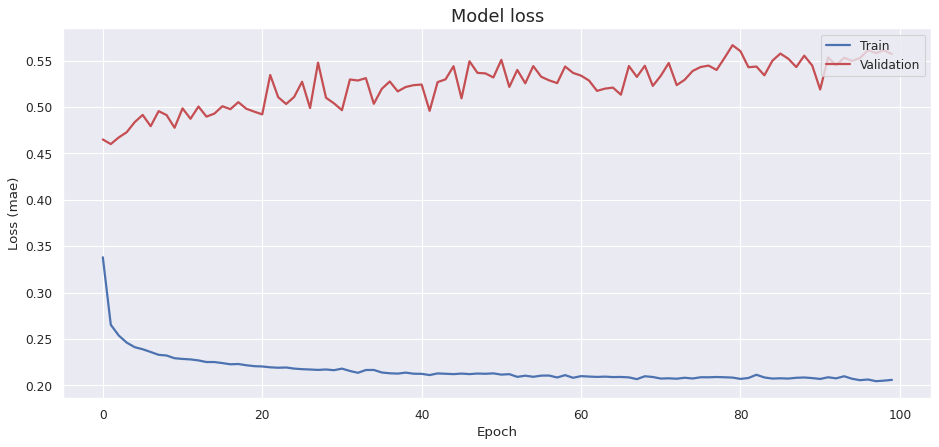

In [89]:
fig, ax = plt.subplots(figsize=(14, 6), dpi=80)
ax.plot(history['loss'], 'b', label='Train', linewidth=2)
ax.plot(history['val_loss'], 'r', label='Validation', linewidth=2)
ax.set_title('Model loss', fontsize=16)
ax.set_ylabel('Loss (mae)')
ax.set_xlabel('Epoch')
ax.legend(loc='upper right')
plt.show()

In [90]:
x_pred_ae = ae_model.predict(x_train_ae_lstm)
x_pred_ae = x_pred_ae.reshape(x_pred_ae.shape[0], x_pred_ae.shape[2])
x_pred_ae = pd.DataFrame(x_pred_ae, columns=rows_ae_train.columns)

3195/3195 [==============================] - 14s 4ms/step


In [91]:
scored = pd.DataFrame()
x_train_layers = x_train_ae_lstm.reshape(x_train_ae_lstm.shape[0], x_train_ae_lstm.shape[2])
scored['Loss_mae'] = np.mean(np.abs(x_pred_ae - x_train_layers),axis=1)

<ipython-input-92-bf2200df796d>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scored['Loss_mae'], bins = 100, kde= True, color = 'blue');


(0.0, 3.5)

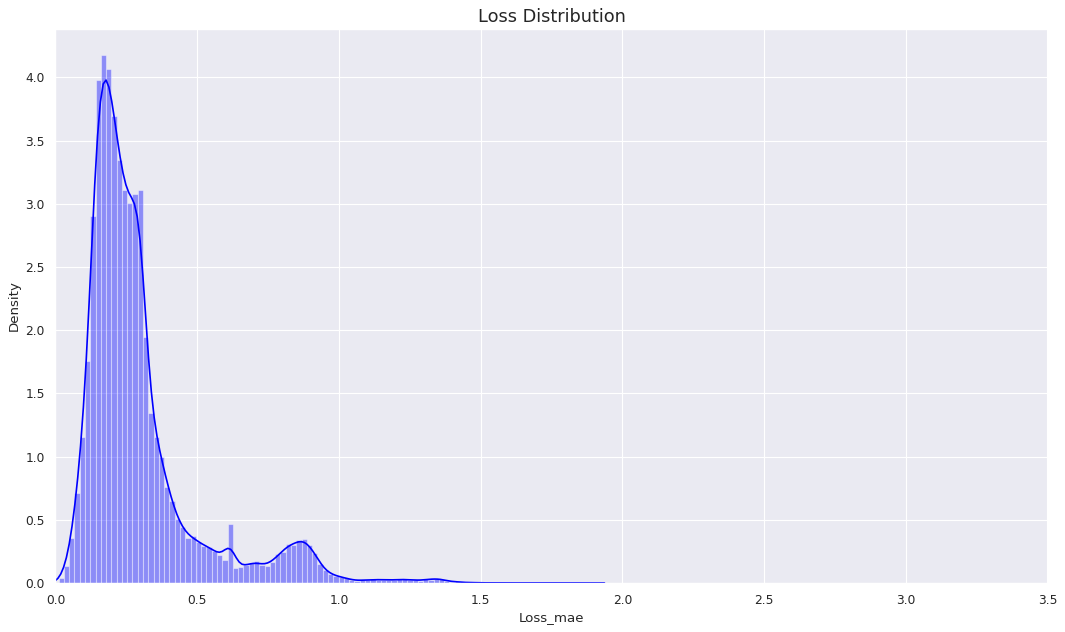

In [92]:
plt.figure(figsize=(16,9), dpi=80)
plt.title('Loss Distribution', fontsize=16)
sns.distplot(scored['Loss_mae'], bins = 100, kde= True, color = 'blue');
plt.xlim([0.0,3.5])

In [185]:
scored['Threshold'] = 0.65
scored['Anomaly'] = scored['Loss_mae'] > scored['Threshold']
anomalies_ae_train = np.array(scored['Anomaly'])
anomalies_ae_train = anomalies_ae_train.astype(int)

In [221]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


accuracy = accuracy_score(anomalies_ae_train,y_train_ae)
precision = precision_score(anomalies_ae_train,y_train_ae)
f1_score = f1_score(anomalies_ae_train,y_train_ae)
recall = recall_score(anomalies_ae_train,y_train_ae)

print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))

anomalies_ae_train[anomalies_ae_train==1].shape

Precision: 0.5210526315789473
Accuracy: 0.9233929339958528
F1_Score: 0.5430038510911425
Recall: 0.5668859649122807


(8208,)

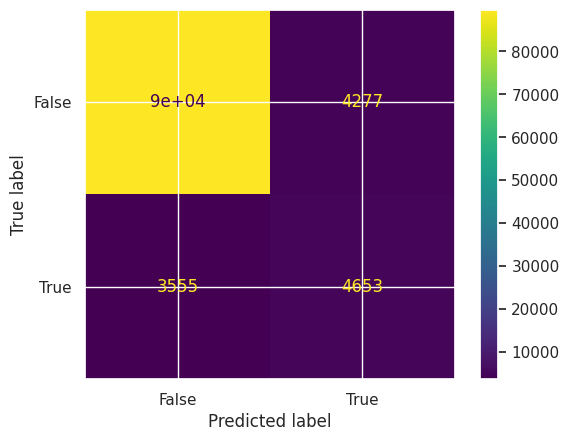

In [224]:
cm_train = confusion_matrix(anomalies_ae_train,y_train_ae)
cm_train_display = ConfusionMatrixDisplay(confusion_matrix = cm_train, display_labels = [False, True])
cm_train_display.plot()
plt.show()

In [236]:
#Make Confusion Matrix and Evaluate TP, TN, FN, FP
def compute_tp_tn_fn_fp(y_act, y_pred):
    tp = sum((y_act == 1) & (y_pred == 1))
    tn = sum((y_act == 0) & (y_pred == 0))
    fn = sum((y_act == 1) & (y_pred == 0))
    fp = sum((y_act == 0) & (y_pred == 1))
    return tp, tn, fp, fn

tp,tn,fn,fp = compute_tp_tn_fn_fp(anomalies_ae_train,y_train_ae)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))

def specificity(tn,fp):
    return tn/(tn+fp)


specificity_train = specificity(tn,fp)
print('Specificity:'+ str(specificity_train))

Number of TP: 4653
Number of TN: 89751
Number of FP: 3555
Number of FN: 4277
Specificity:0.9618995562986303


In [187]:
df_train_ae['Anomaly'] = anomalies_ae_train

<ipython-input-187-0d7313a408ba>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_ae['Anomaly'] = anomalies_ae_train


In [188]:
count0 = (df_train_ae['Anomaly'] == 0).sum()
count1 = (df_train_ae['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

94028 8208


In [189]:
anomaly_ae_train = df_train_ae[df_train_ae['Anomaly'] == 1]
no_anomaly_ae_train = df_train_ae[df_train_ae['Anomaly'] == 0]

In [190]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_train['Timestamp'].isin(anomaly_ae_train['Timestamp']).sum())

4653


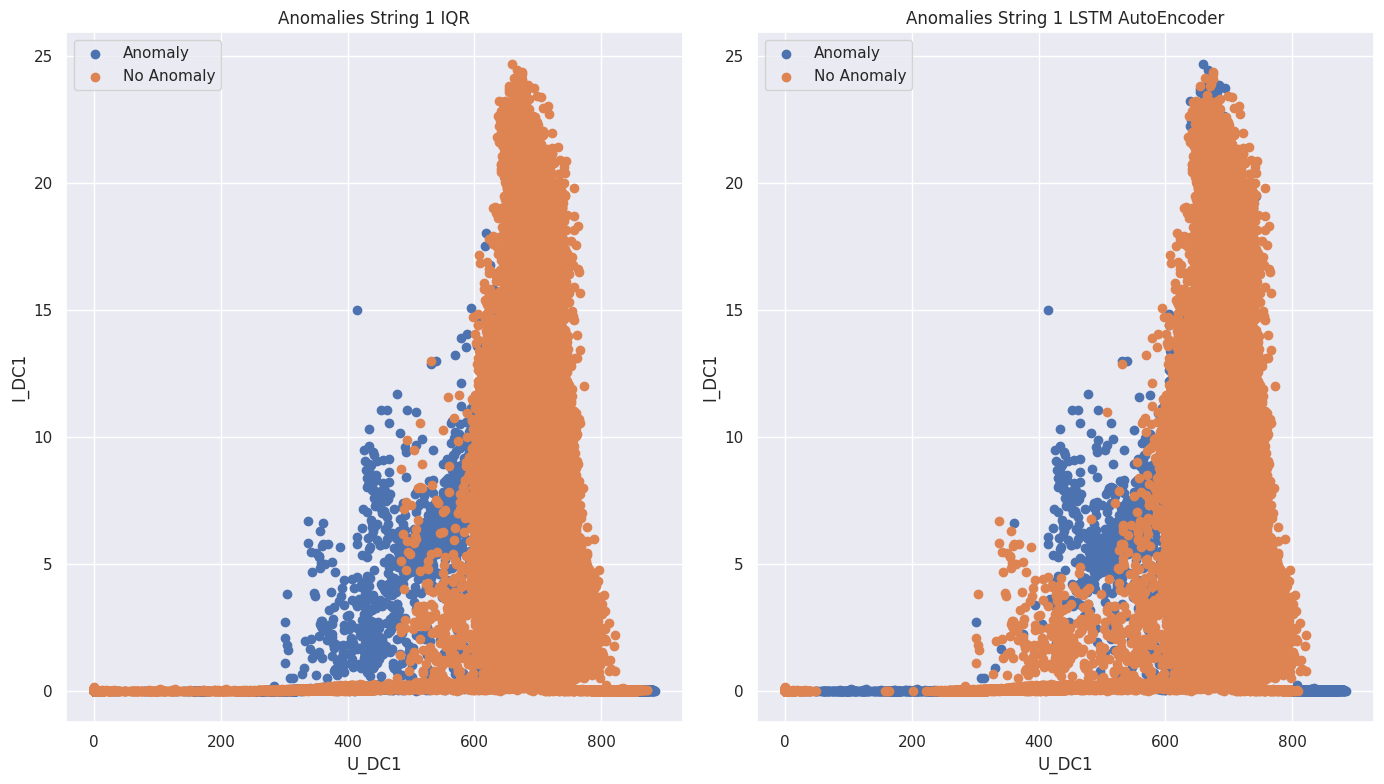

In [191]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC1'], anomaly_iqr_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC1'], no_anomaly_iqr_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_train['U_DC1'], anomaly_ae_train['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_ae_train['U_DC1'], no_anomaly_ae_train['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

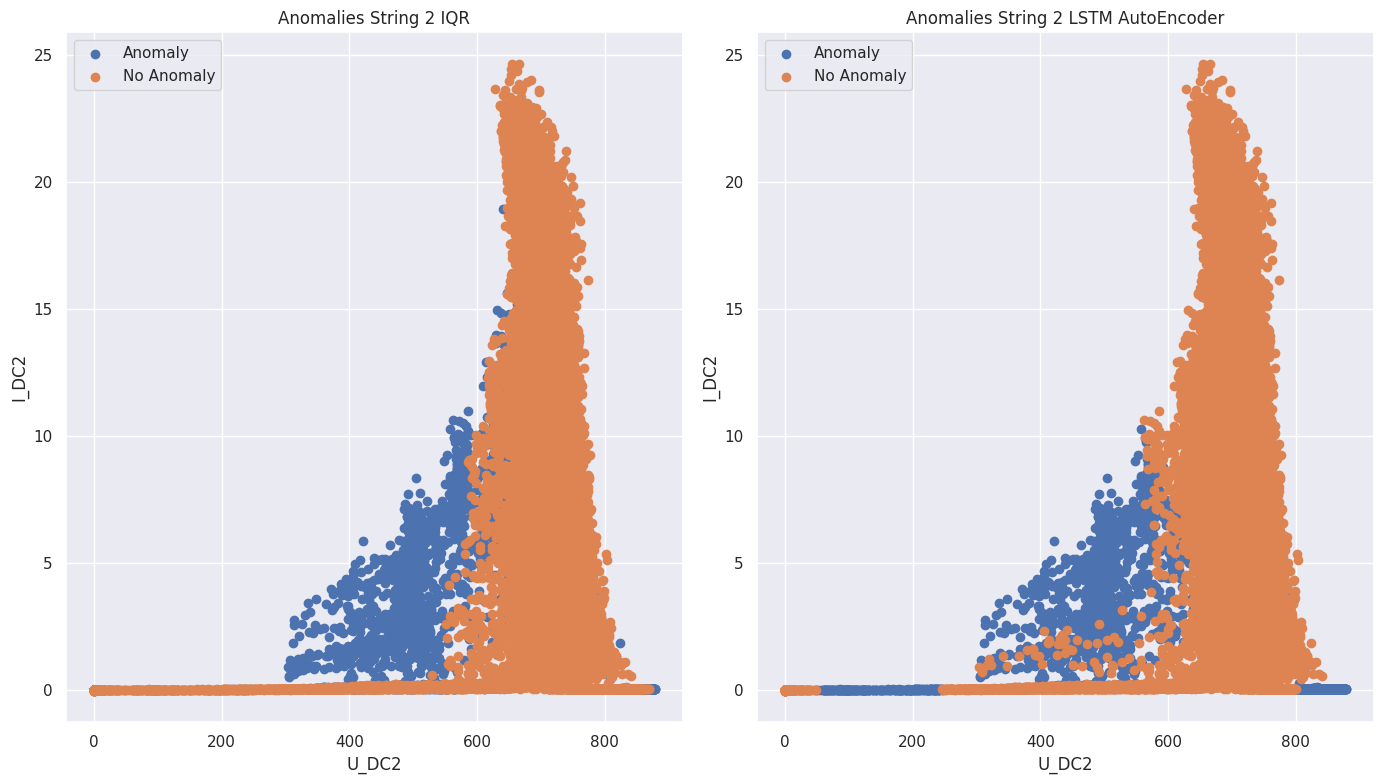

In [192]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_train['U_DC2'], anomaly_iqr_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_train['U_DC2'], no_anomaly_iqr_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_train['U_DC2'], anomaly_ae_train['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_ae_train['U_DC2'], no_anomaly_ae_train['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

#### Datos de Prueba

In [193]:
x_pred_ae_test = ae_model.predict(x_test_ae_lstm)
x_pred_ae_test = x_pred_ae_test.reshape(x_pred_ae_test.shape[0], x_pred_ae_test.shape[2])
x_pred_ae_test = pd.DataFrame(x_pred_ae_test, columns=rows_ae_test.columns)

1506/1506 [==============================] - 6s 4ms/step


In [194]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

scored_test = pd.DataFrame()
x_test_layers = x_test_ae_lstm.reshape(x_test_ae_lstm.shape[0], x_test_ae_lstm.shape[2])
scored_test['Loss_mae'] = np.mean(np.abs(x_pred_ae_test-x_test_layers), axis = 1)
scored_test['Threshold'] = 0.65
scored_test['Anomaly'] = scored_test['Loss_mae'] > scored_test['Threshold']
anomalies_ae_test = np.array(scored_test['Anomaly'])
anomalies_ae_test = anomalies_ae_test.astype(int)
accuracy = accuracy_score(anomalies_ae_test,y_test_ae)
precision = precision_score(anomalies_ae_test,y_test_ae)
f1_score = f1_score(anomalies_ae_test,y_test_ae)
recall = recall_score(anomalies_ae_test,y_test_ae)
print("Precision: "+ str(precision))
print("Accuracy: "+ str(accuracy))
print("F1_Score: "+ str(f1_score))
print("Recall: "+ str(recall))
anomalies_ae_test[anomalies_ae_test==1].shape

Precision: 0.994816126465984
Accuracy: 0.9840745816203647
F1_Score: 0.9902039669463709
Recall: 0.9856343757945588


(39330,)

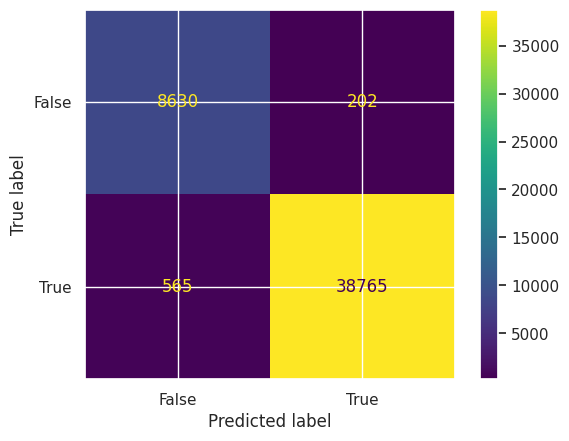

In [225]:
cm_test = confusion_matrix(anomalies_ae_test,y_test_ae)
cm_test_display = ConfusionMatrixDisplay(confusion_matrix = cm_test, display_labels = [False, True])
cm_test_display.plot()
plt.show()

In [235]:
tp,tn,fn,fp = compute_tp_tn_fn_fp(anomalies_ae_test,y_test_ae)
print("Number of TP: "+str(tp))
print("Number of TN: "+str(tn))
print("Number of FP: "+str(fp))
print("Number of FN: "+str(fn))


specificity_test = specificity(tn,fp)
print('Specificity:'+ str(specificity_test))


Number of TP: 38765
Number of TN: 8630
Number of FP: 565
Number of FN: 202
Specificity:0.9385535617183252


In [195]:
df_test_ae['Anomaly'] = anomalies_ae_test

<ipython-input-195-9956cf24a2bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_ae['Anomaly'] = anomalies_ae_test


In [196]:
count0 = (df_test_ae['Anomaly'] == 0).sum()
count1 = (df_test_ae['Anomaly'] == 1).sum()

#Contar números de anomalías detectadas y no detectadas
print(count0, count1)

8832 39330


In [197]:
anomaly_ae_test = df_test_ae[df_test_ae['Anomaly'] == 1]
no_anomaly_ae_test = df_test_ae[df_test_ae['Anomaly'] == 0]

In [198]:
#Coincidencias con modelo estadístico
print(anomaly_iqr_test['Timestamp'].isin(anomaly_ae_test['Timestamp']).sum())

38765


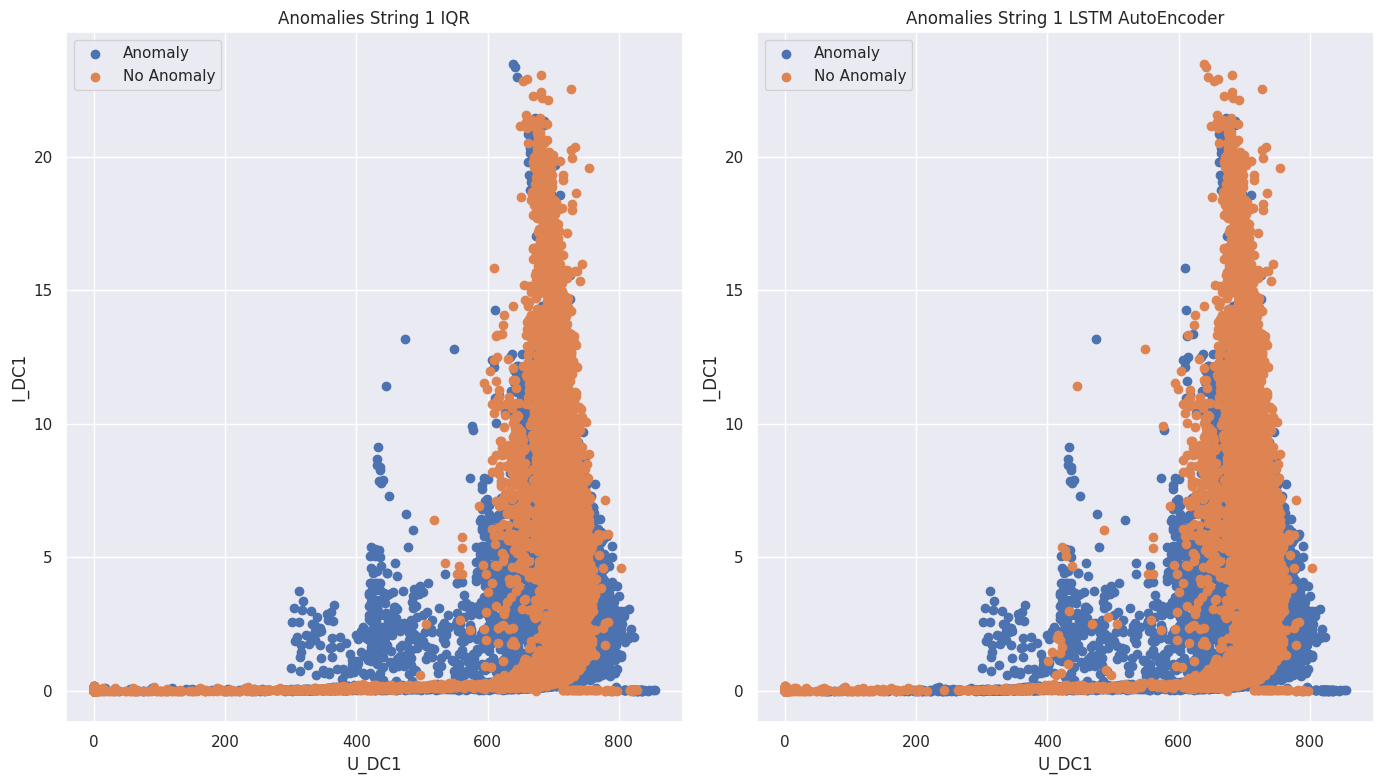

In [199]:
#STRING1

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC1'], anomaly_iqr_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC1'], no_anomaly_iqr_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_test['U_DC1'], anomaly_ae_test['I_DC1'], label='Anomaly')
plt.scatter(no_anomaly_ae_test['U_DC1'], no_anomaly_ae_test['I_DC1'], label='No Anomaly')
plt.xlabel('U_DC1')
plt.ylabel('I_DC1')
plt.legend()
plt.title('Anomalies String 1 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

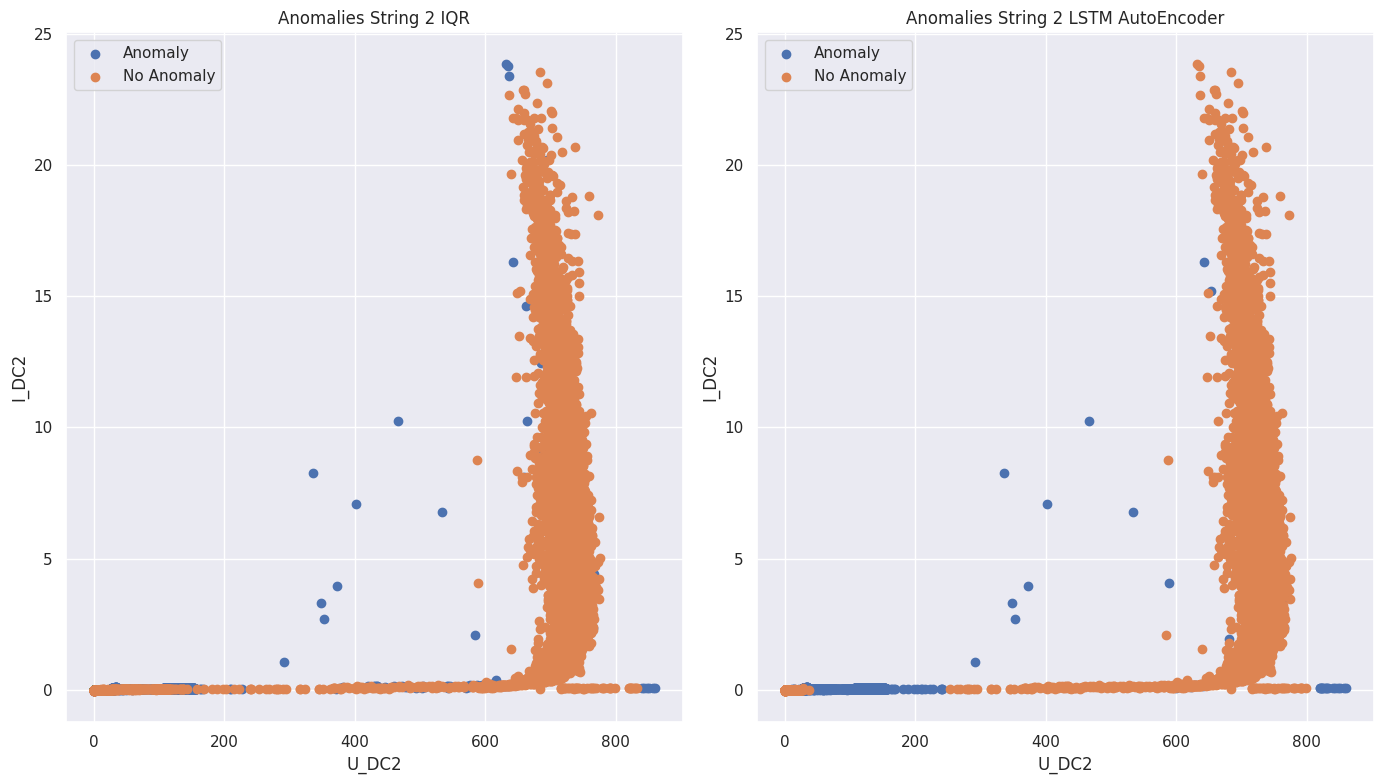

In [200]:
#STRING2

# Gráfico 1
plt.figure(figsize=(14, 8))


# Gráfico 1
plt.subplot(1, 2, 1)
plt.scatter(anomaly_iqr_test['U_DC2'], anomaly_iqr_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_iqr_test['U_DC2'], no_anomaly_iqr_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 IQR')


#Gráfico 2
plt.subplot(1, 2, 2)
plt.scatter(anomaly_ae_test['U_DC2'], anomaly_ae_test['I_DC2'], label='Anomaly')
plt.scatter(no_anomaly_ae_test['U_DC2'], no_anomaly_ae_test['I_DC2'], label='No Anomaly')
plt.xlabel('U_DC2')
plt.ylabel('I_DC2')
plt.legend()
plt.title('Anomalies String 2 LSTM AutoEncoder')


# Ajustes de diseño
plt.tight_layout()
plt.show()

### **EXPORTAR DATOS DE MÉTODO: LSTM AUTOENCODER**

In [206]:
ml_anomaly_df = pd.concat([df_train_ae,df_test_ae])

In [239]:
ml_anomaly_df

,Timestamp,U_DC1,U_DC2,I_DC1,I_DC2,Anomaly
131,2019-08-02 16:25:00,777.010,768.710,2.700,2.607,0
132,2019-08-02 16:30:00,761.130,745.964,3.862,3.748,0
133,2019-08-02 16:35:00,736.754,742.908,3.228,3.192,0
134,2019-08-02 16:40:00,731.928,732.224,2.568,2.484,0
135,2019-08-02 16:45:00,723.546,720.698,1.654,1.640,0
...,...,...,...,...,...,...
203056,2023-06-02 10:10:00,712.860,698.410,15.514,15.758,0
203057,2023-06-02 10:15:00,703.810,696.148,16.136,16.278,0
203058,2023-06-02 10:20:00,702.586,466.782,16.520,10.250,1
203059,2023-06-02 10:25:00,703.080,32.316,15.754,0.080,1


In [237]:
#ml_anomaly_df.to_csv('df_with_anomalies.csv', sep=';', index=False, encoding='utf-8')